In [1]:
import sys
sys.path.insert(0,'/home/djl34/kl_git/scripts')
from notebook_imports import *
import einops

client = Client()

/home/djl34/mambaforge/envs/raklette/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(


In [9]:
def plot_zscore(df_plot, chrom):
    sns.set_theme(style="darkgrid")

    di = {"Zscore_9_reverse_log": "$\sum{log(p_{reverse})}$", "Zscore_Gnocchi": "Poisson", "Zscore_9": "$\sum{p}$", "Zscore_2": "Binomial"}
    df_plot = df_plot.replace({"type": di})
    
    g = sns.FacetGrid(df_plot, col="type", height=6, margin_titles=True)
    
    g.map(sns.histplot, "Zscore", binwidth=0.5, kde=False, stat='density', label='samples')
    
    g.set_titles(col_template="{col_name}")
    # g.set_titles(col_template="Mu: {col_name}", row_template="window length: {row_name}")
    
    n_sites = 10000
    g.fig.suptitle(f'Before Shuffling, Chr{chrom} Intergenic Region, Zscore for {n_sites} sites')
    
    def standard_normal(*args, **kwargs):
        # x0, x1 = ax.get_xlim()  # extract the endpoints for the x-axis
        x_pdf = np.linspace(-4, 4, 100)
        y_pdf = scipy.stats.norm.pdf(x_pdf)
    
        plt.plot(x_pdf, y_pdf, 'r', lw=2, label='pdf')   
    
    g.map(standard_normal)
        

# Plot over multiple chromosomes

/home/djl34/mambaforge/envs/raklette/lib/python3.9/site-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


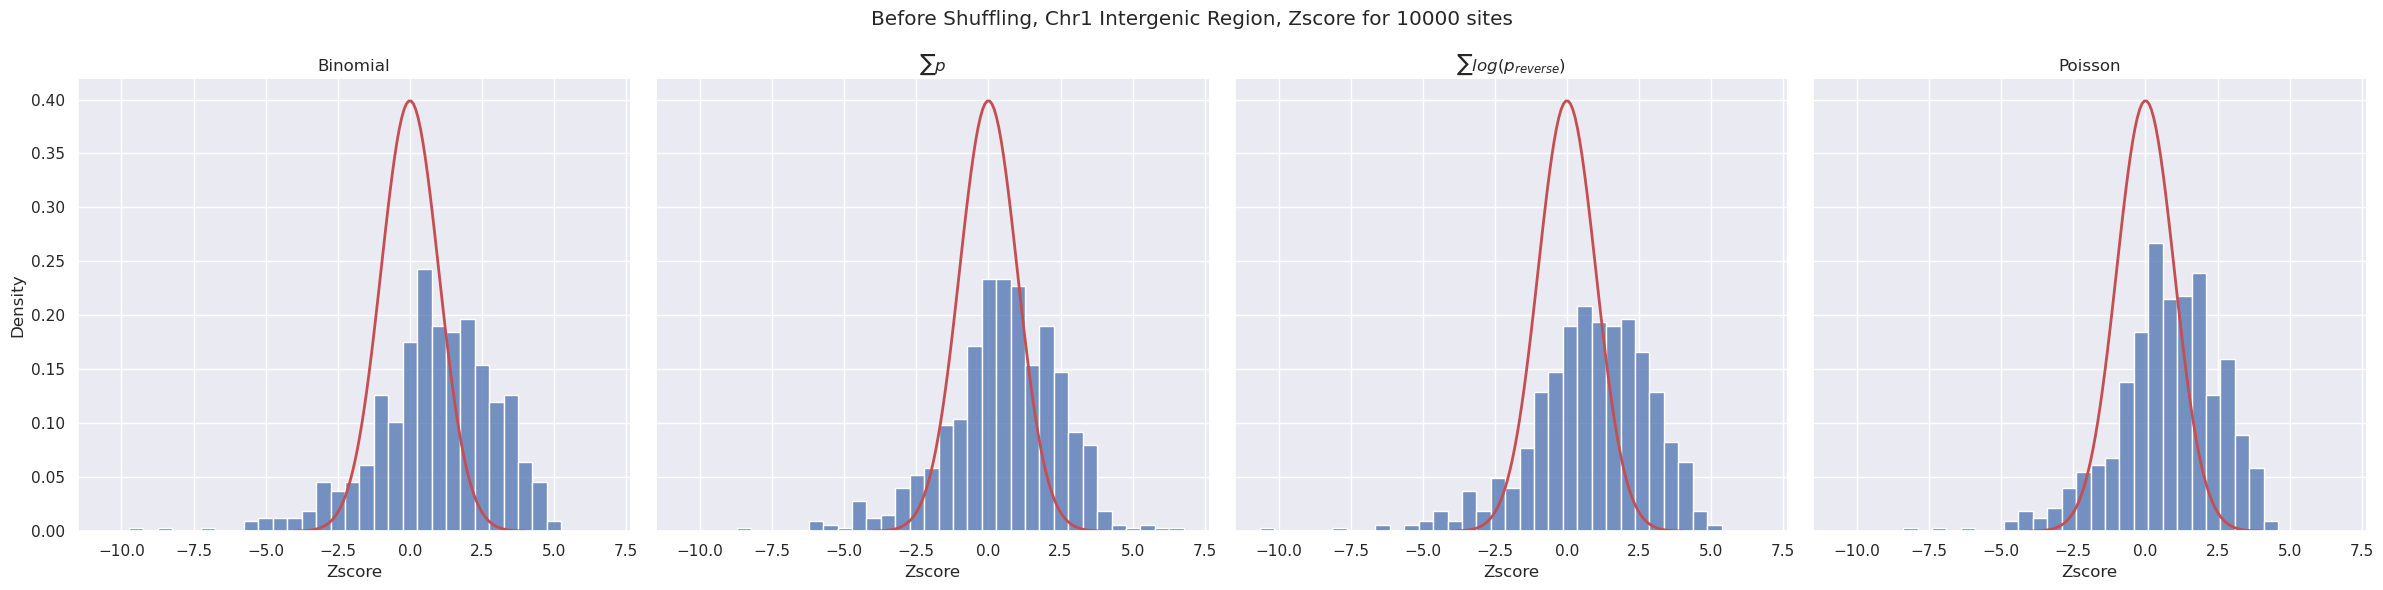

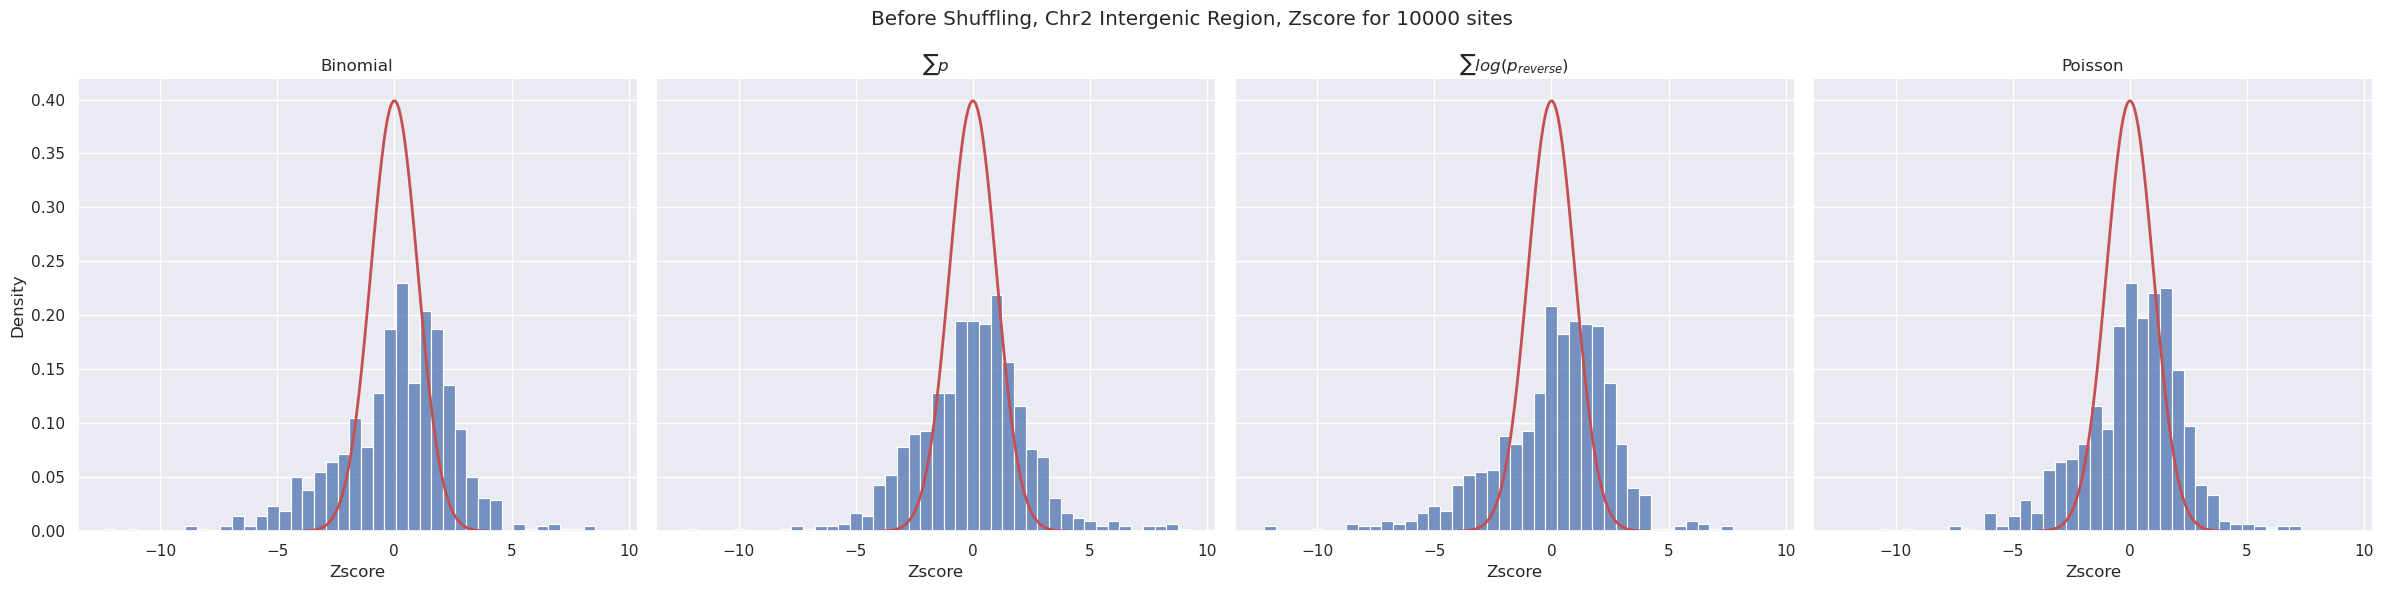

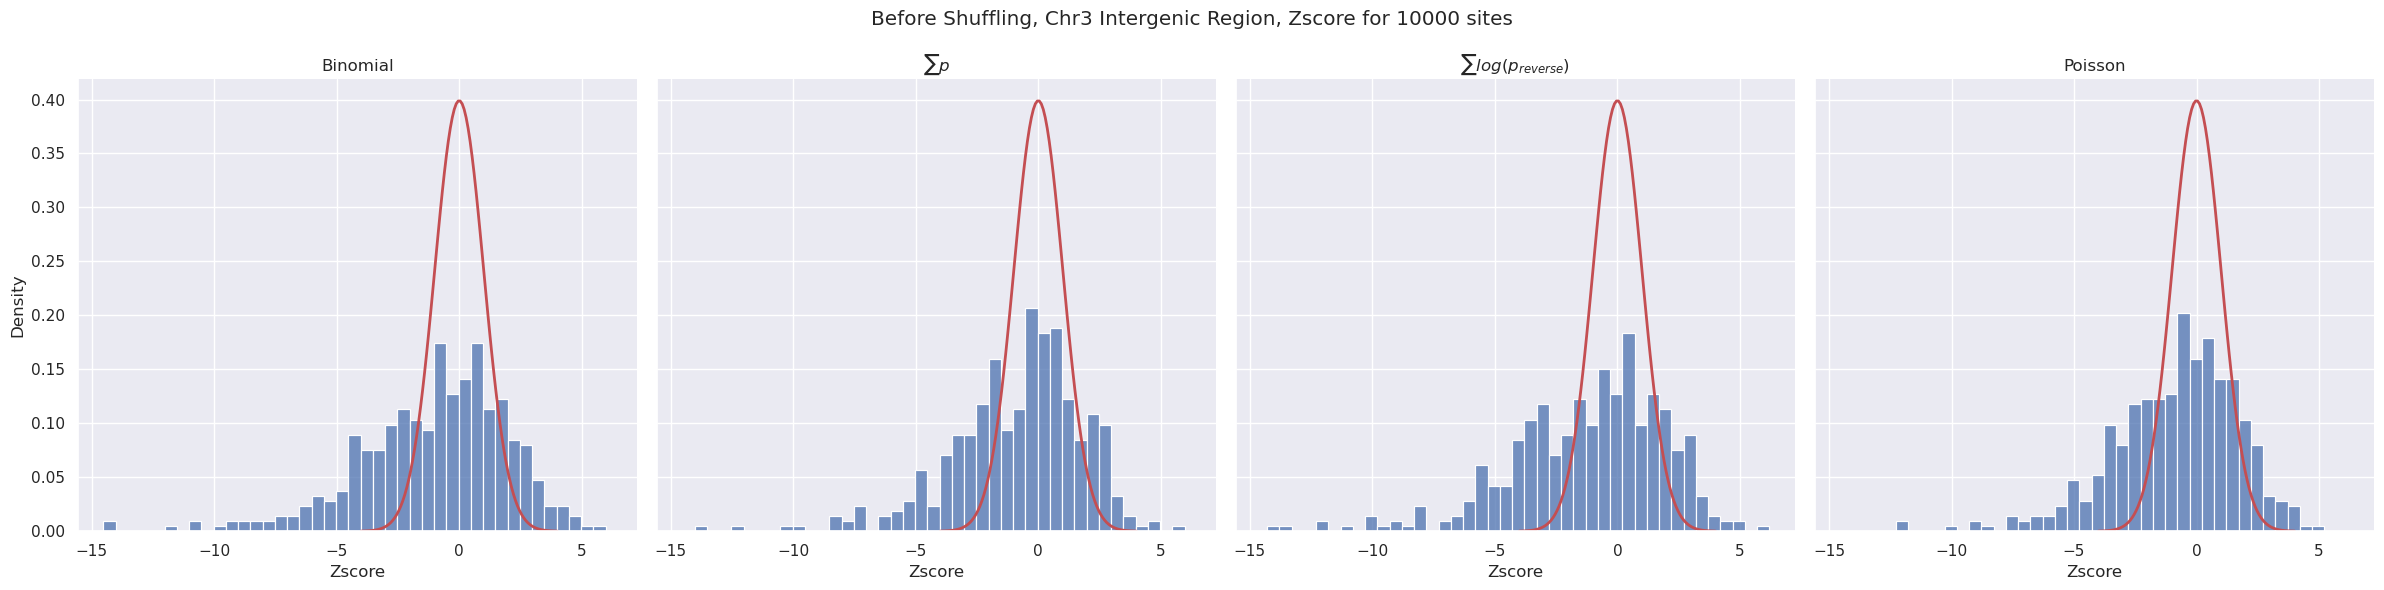

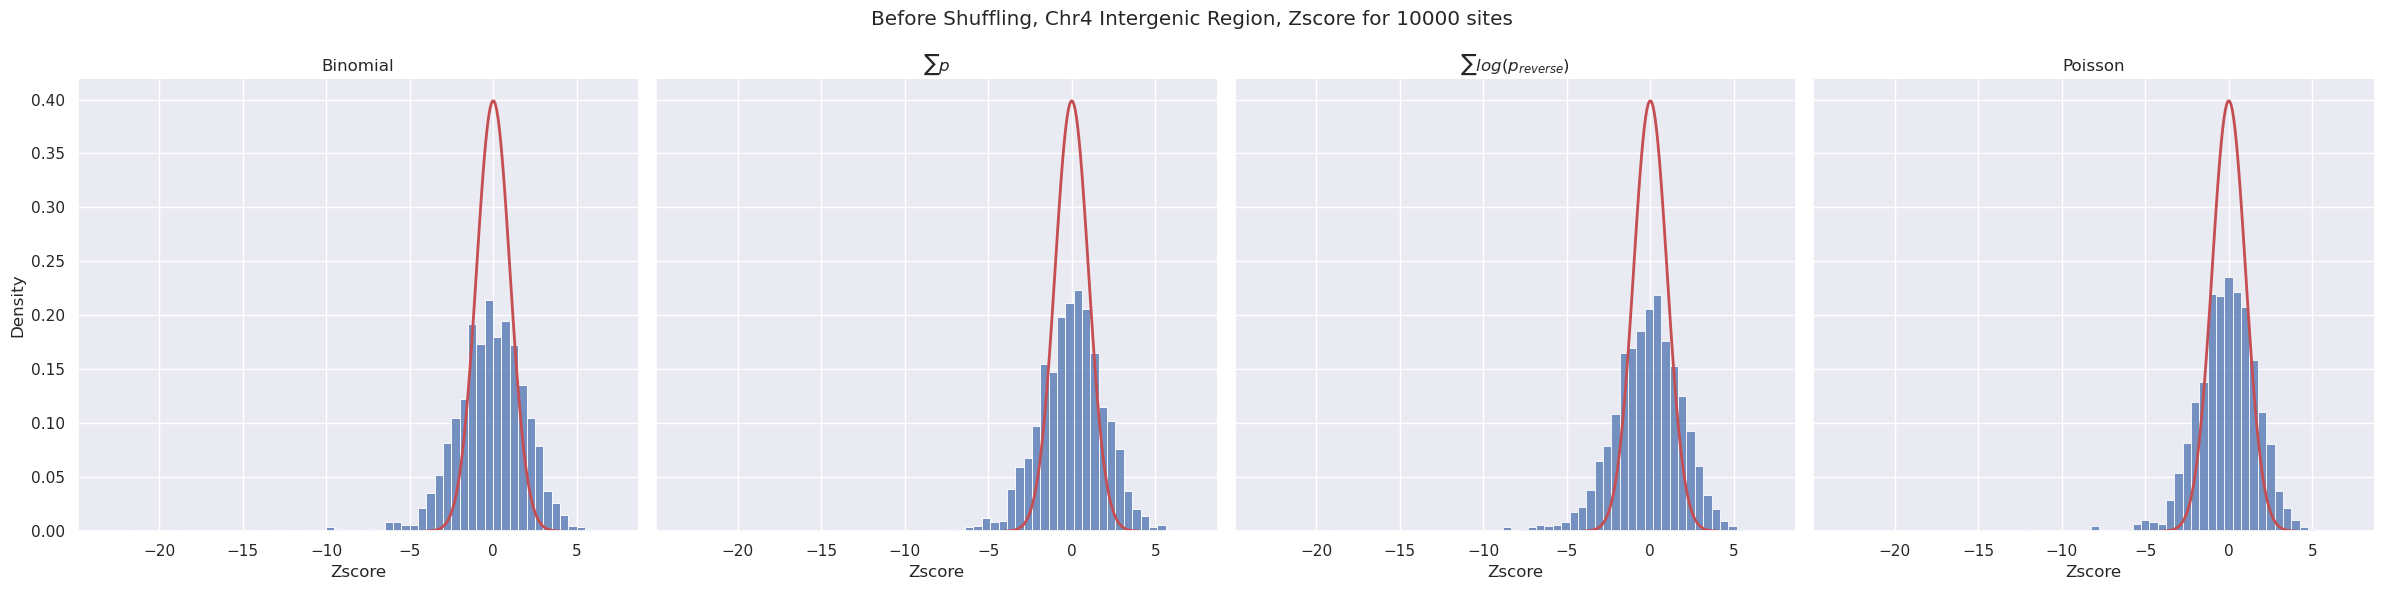

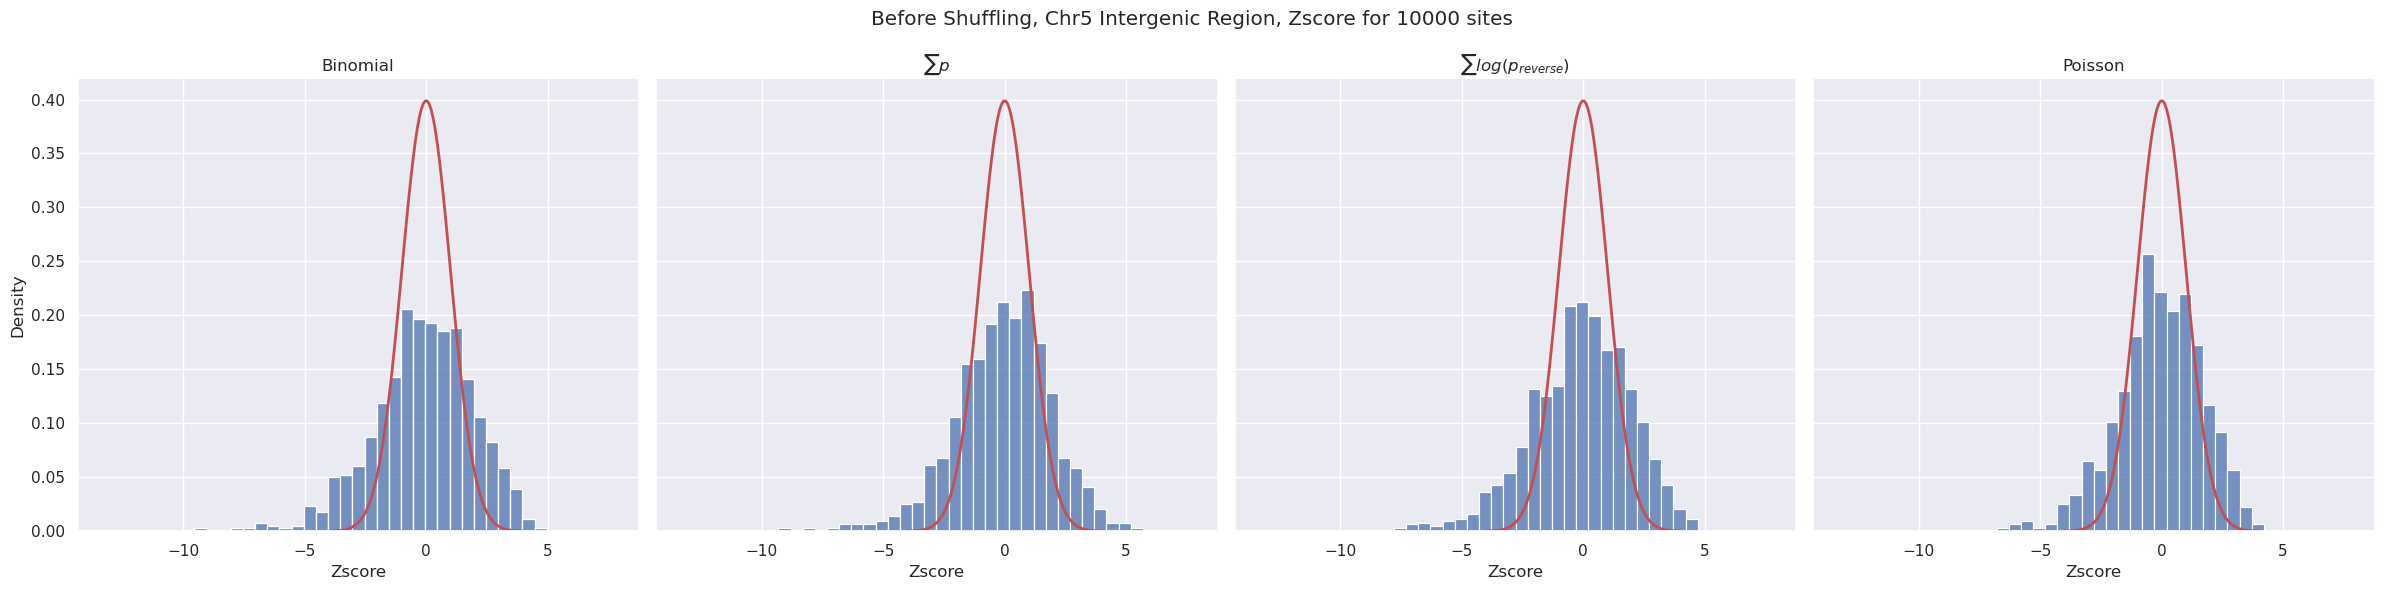

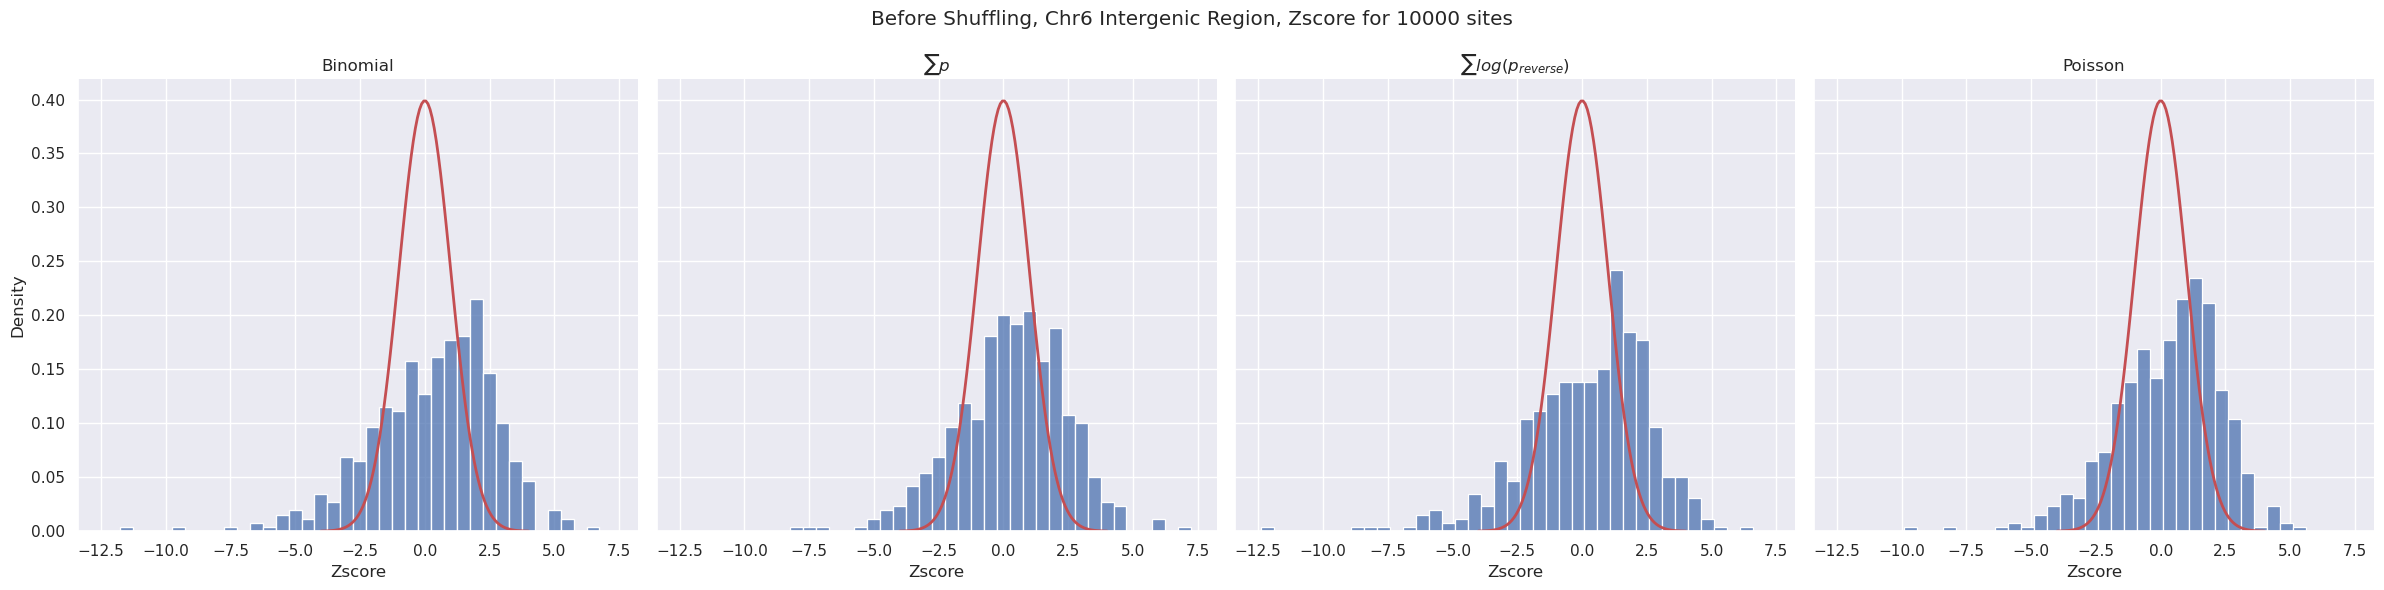

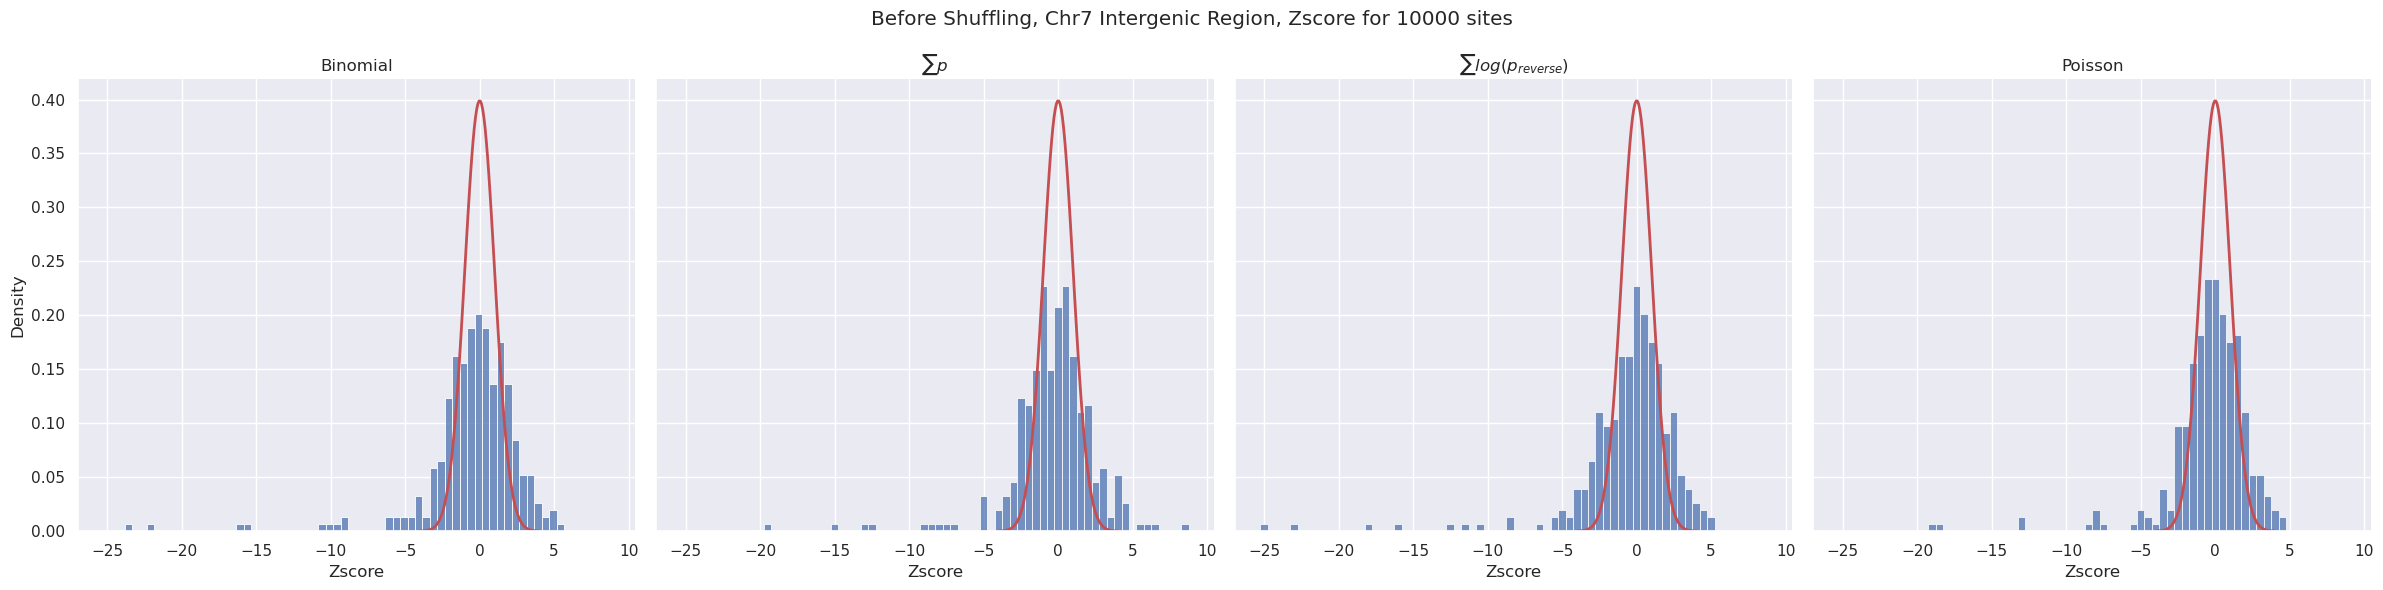

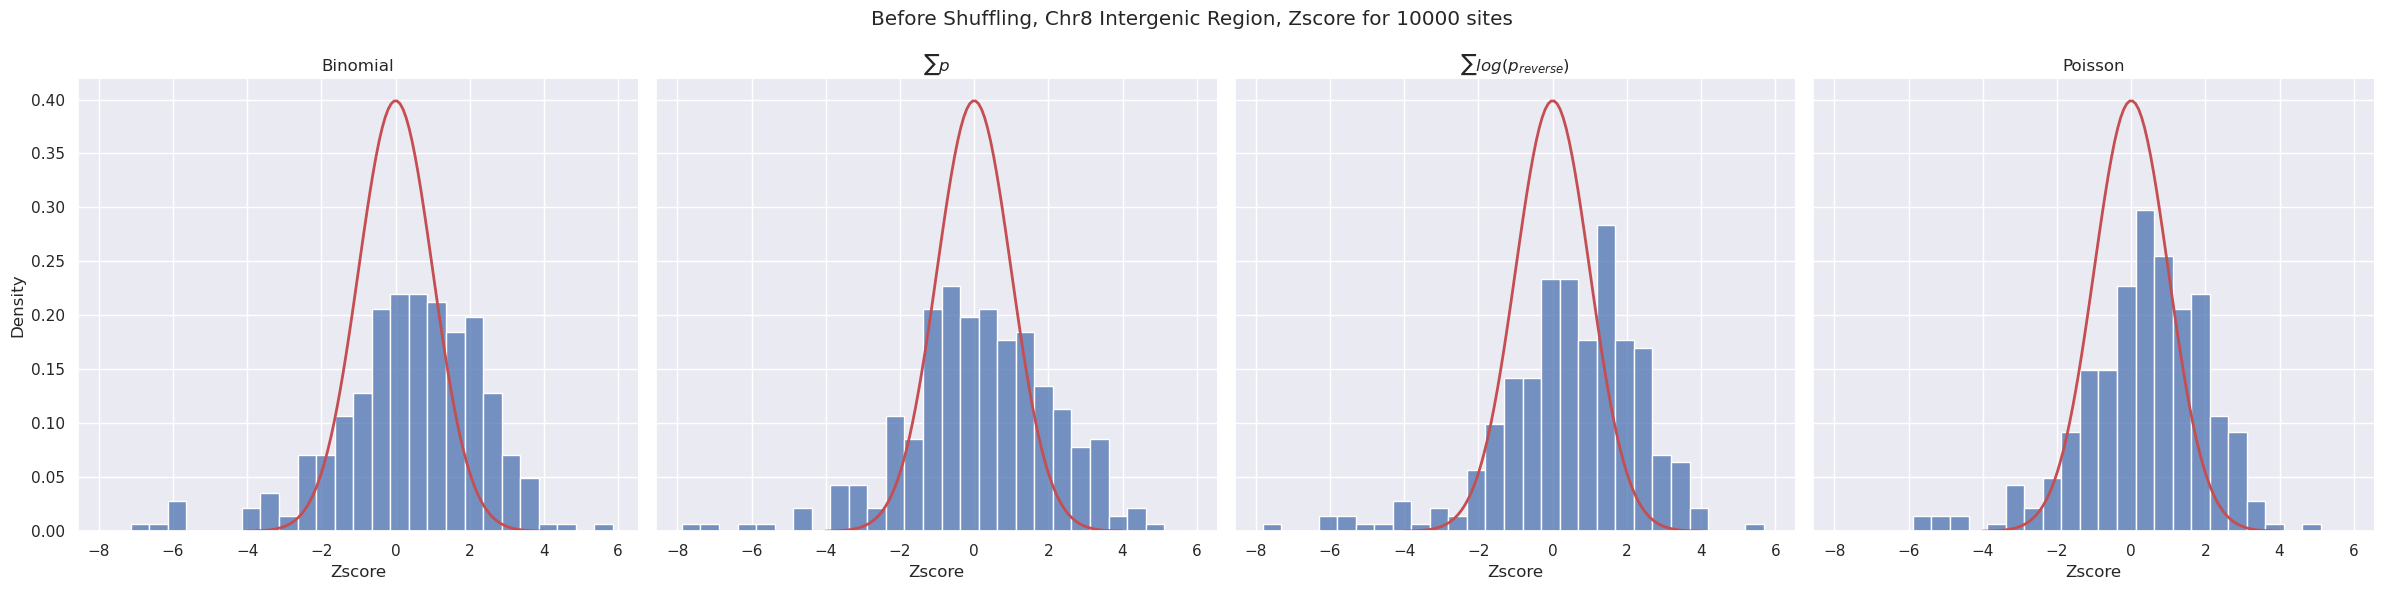

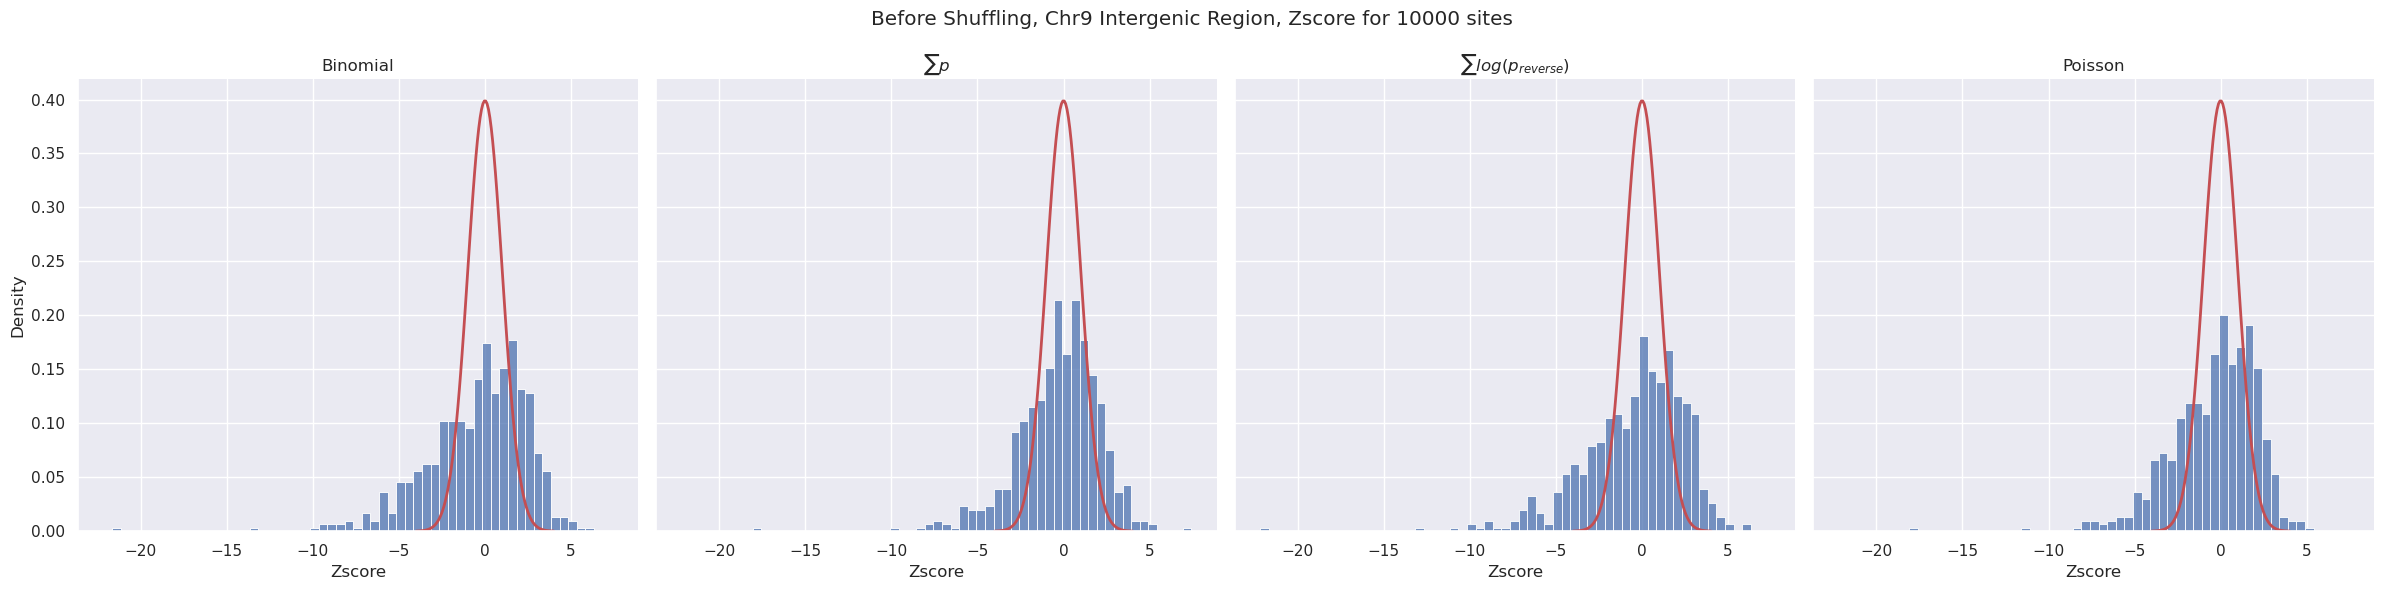

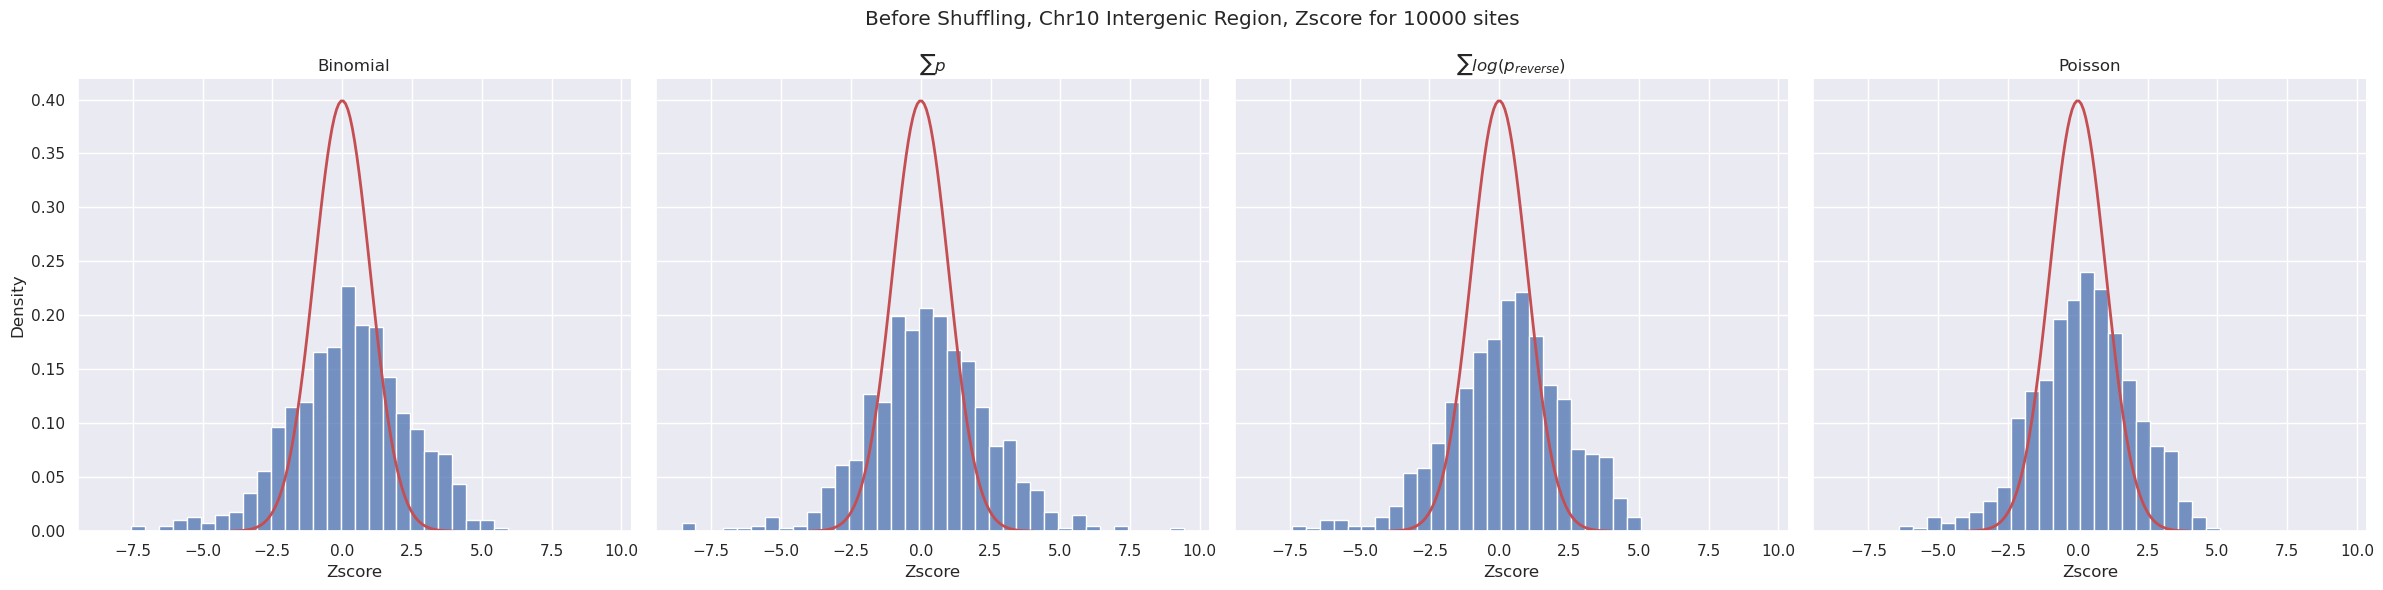

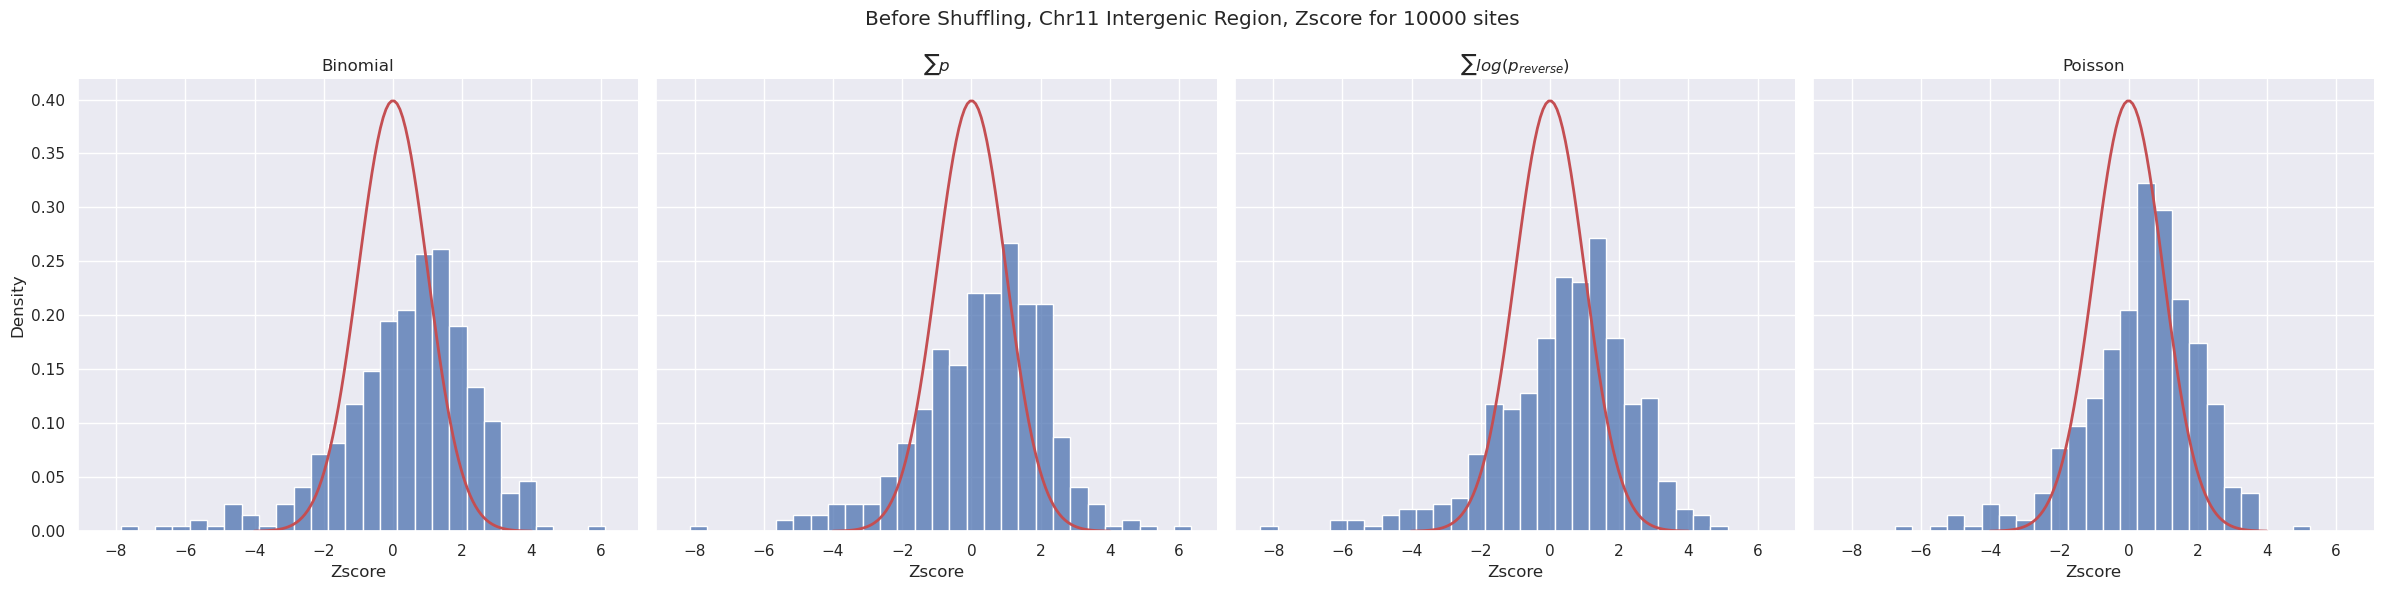

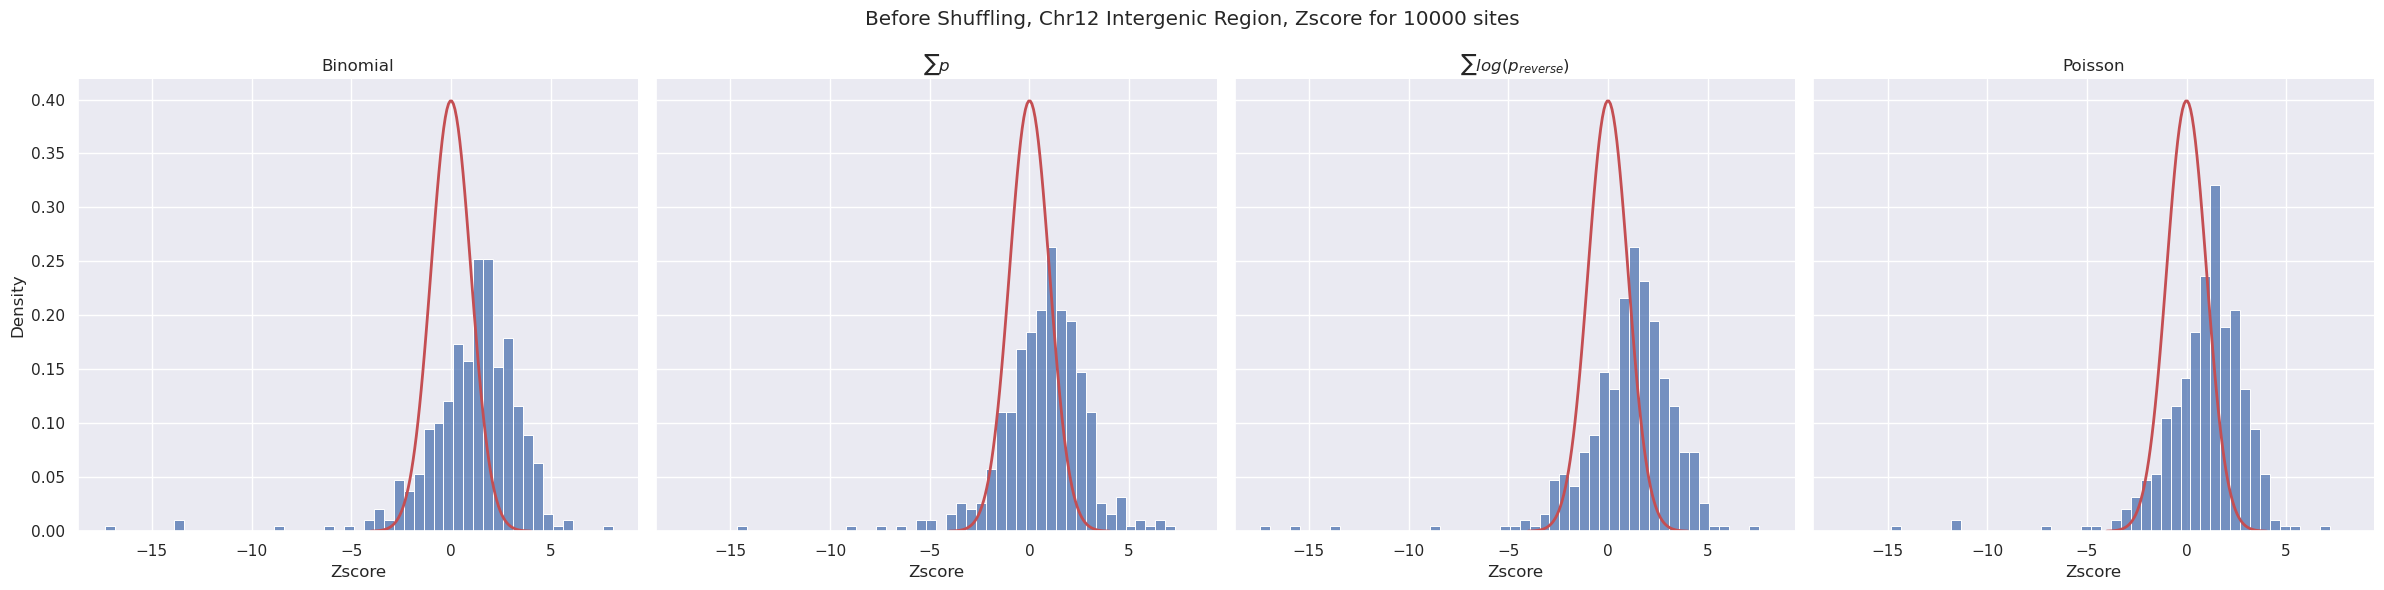

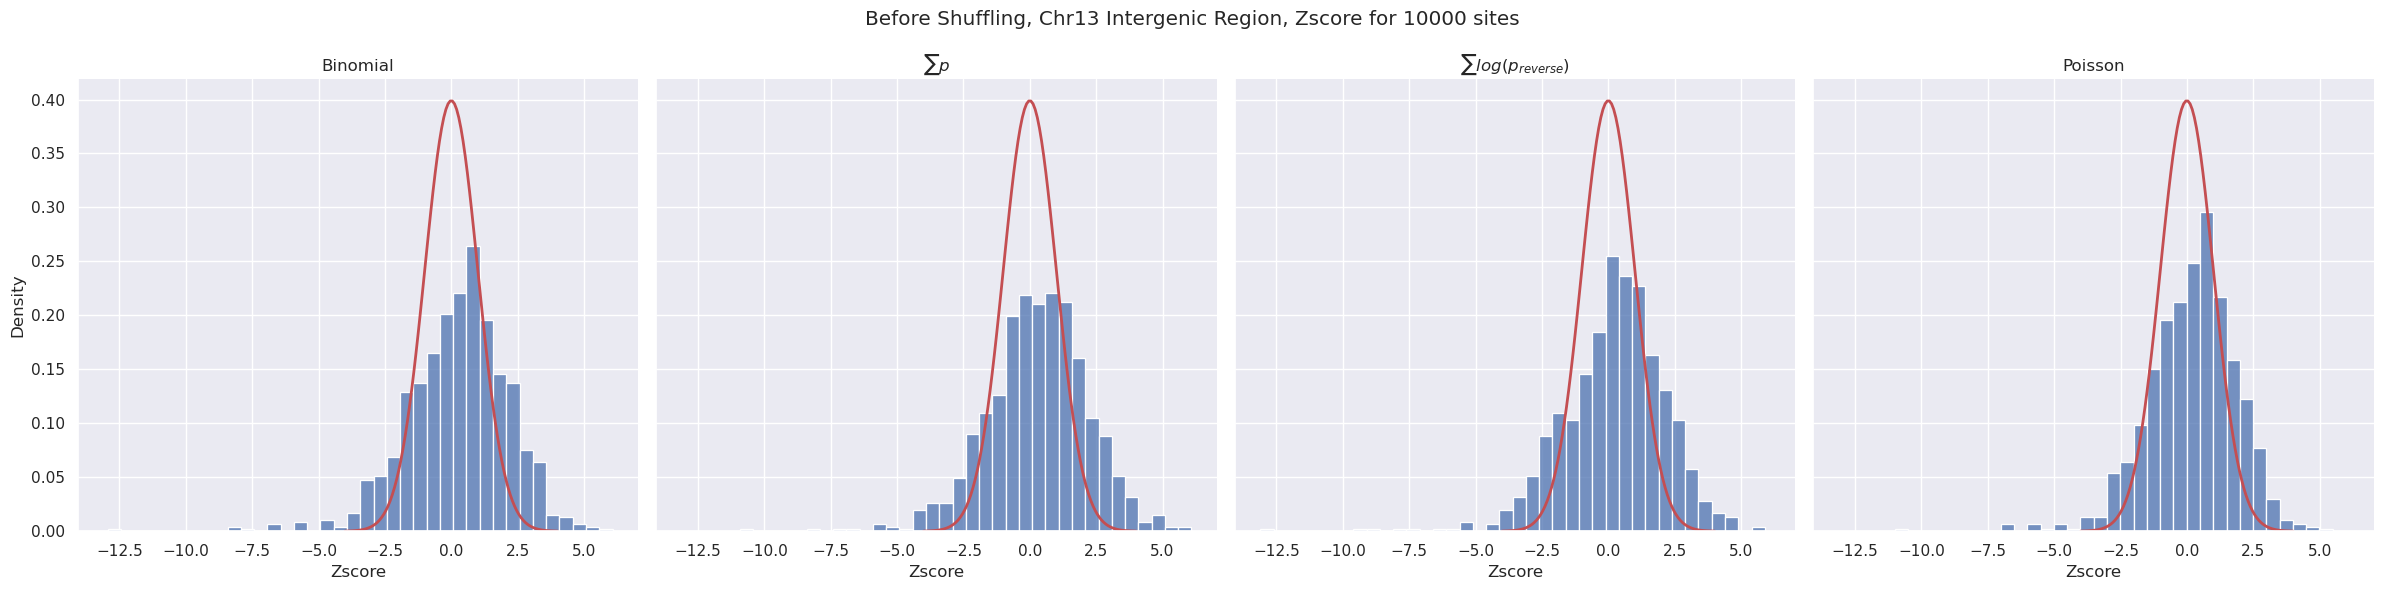

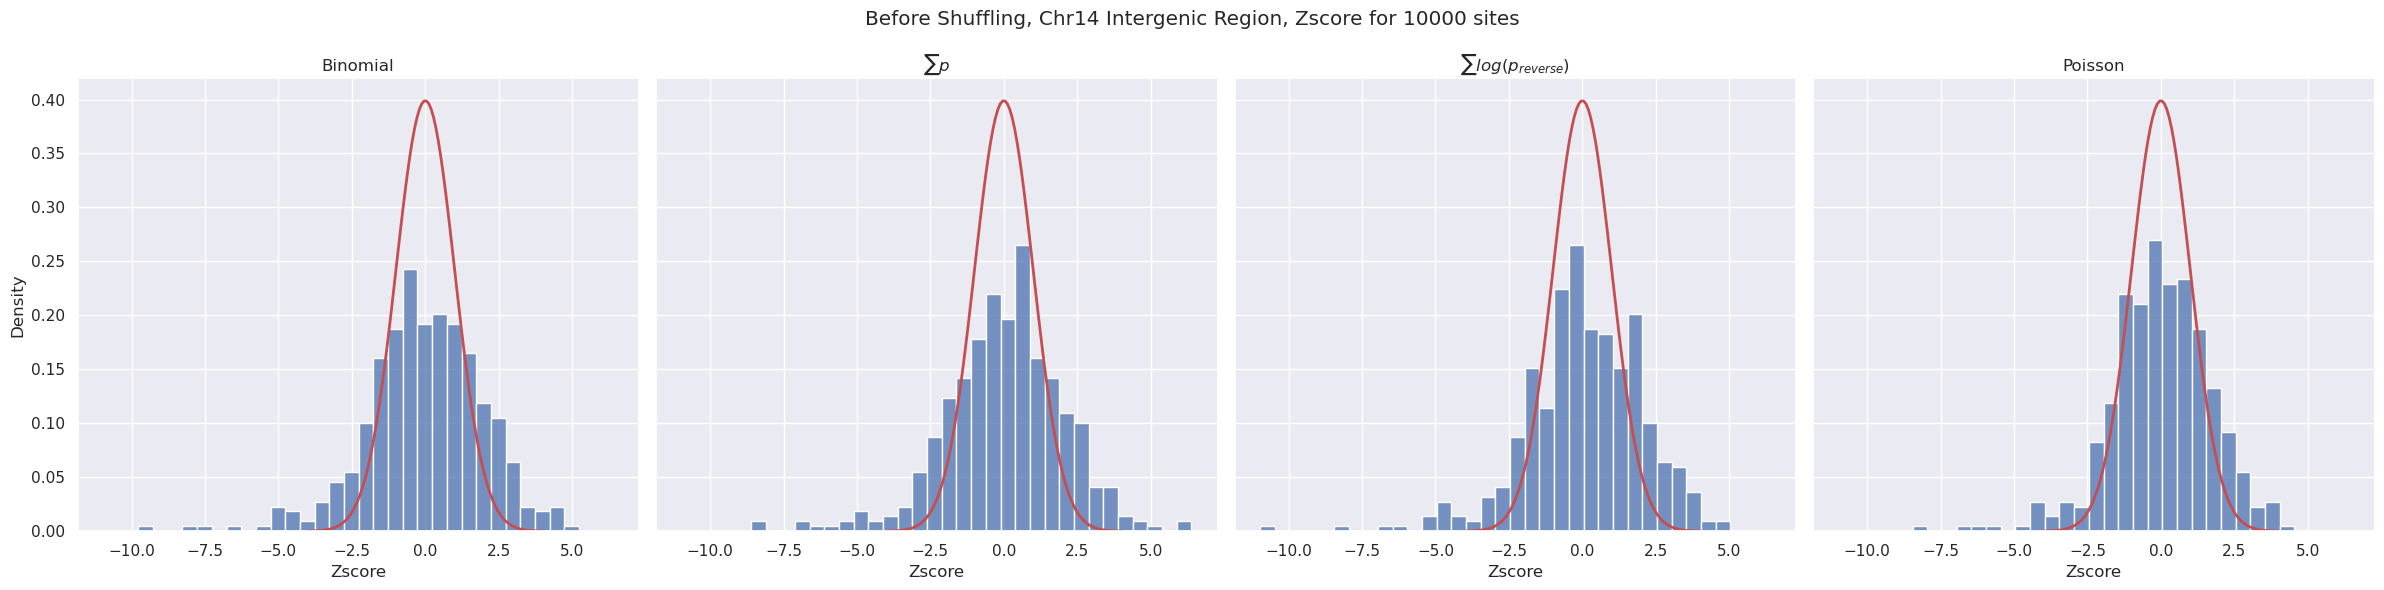

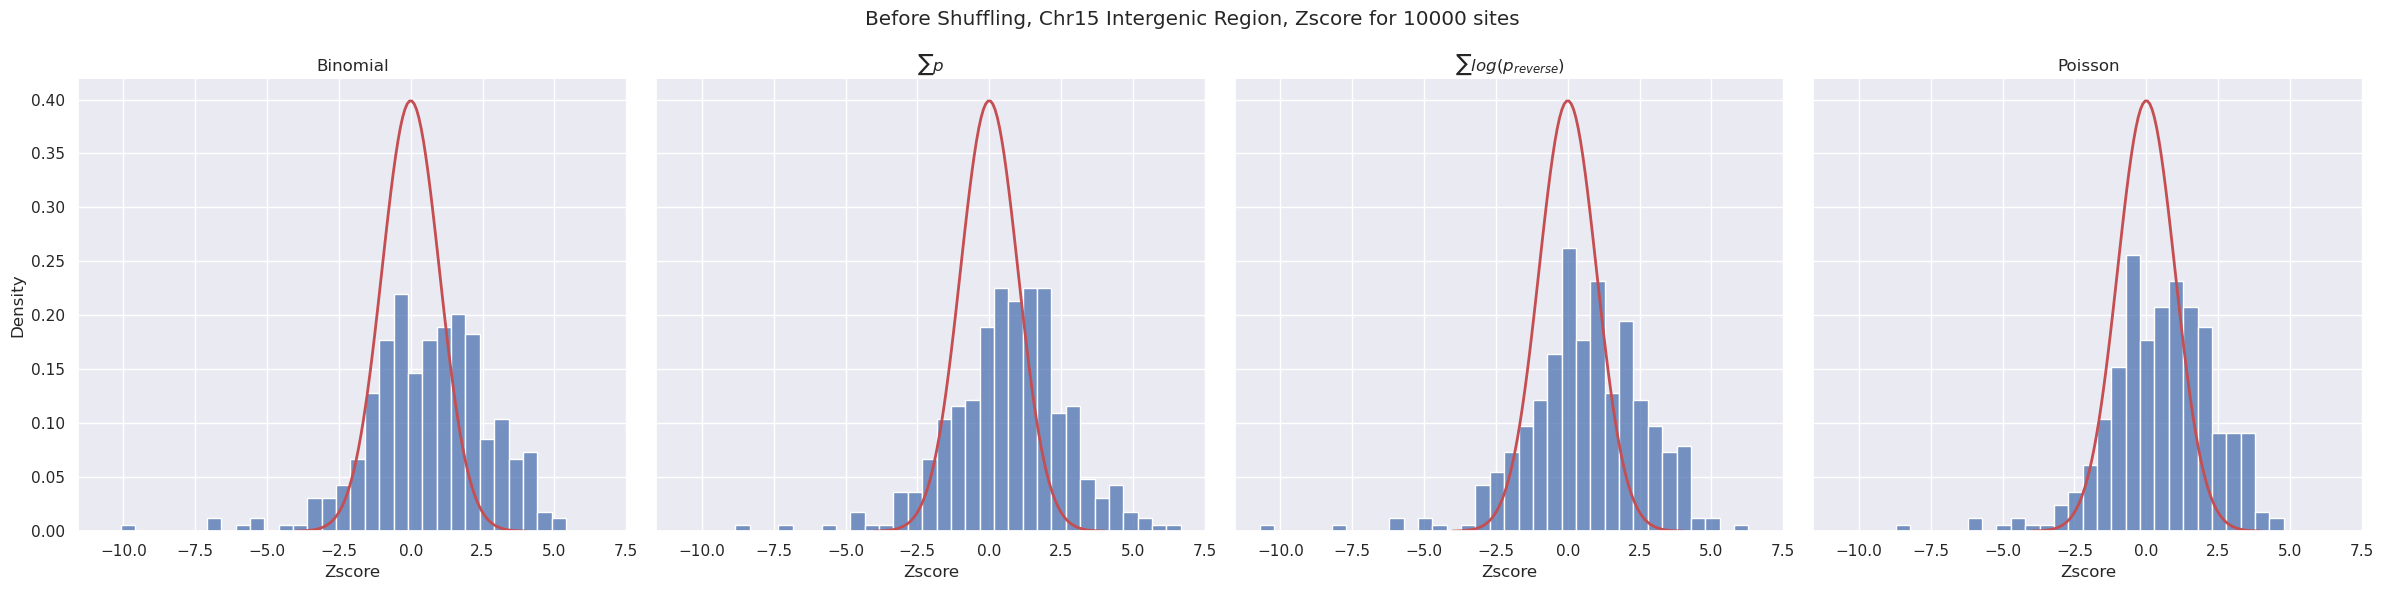

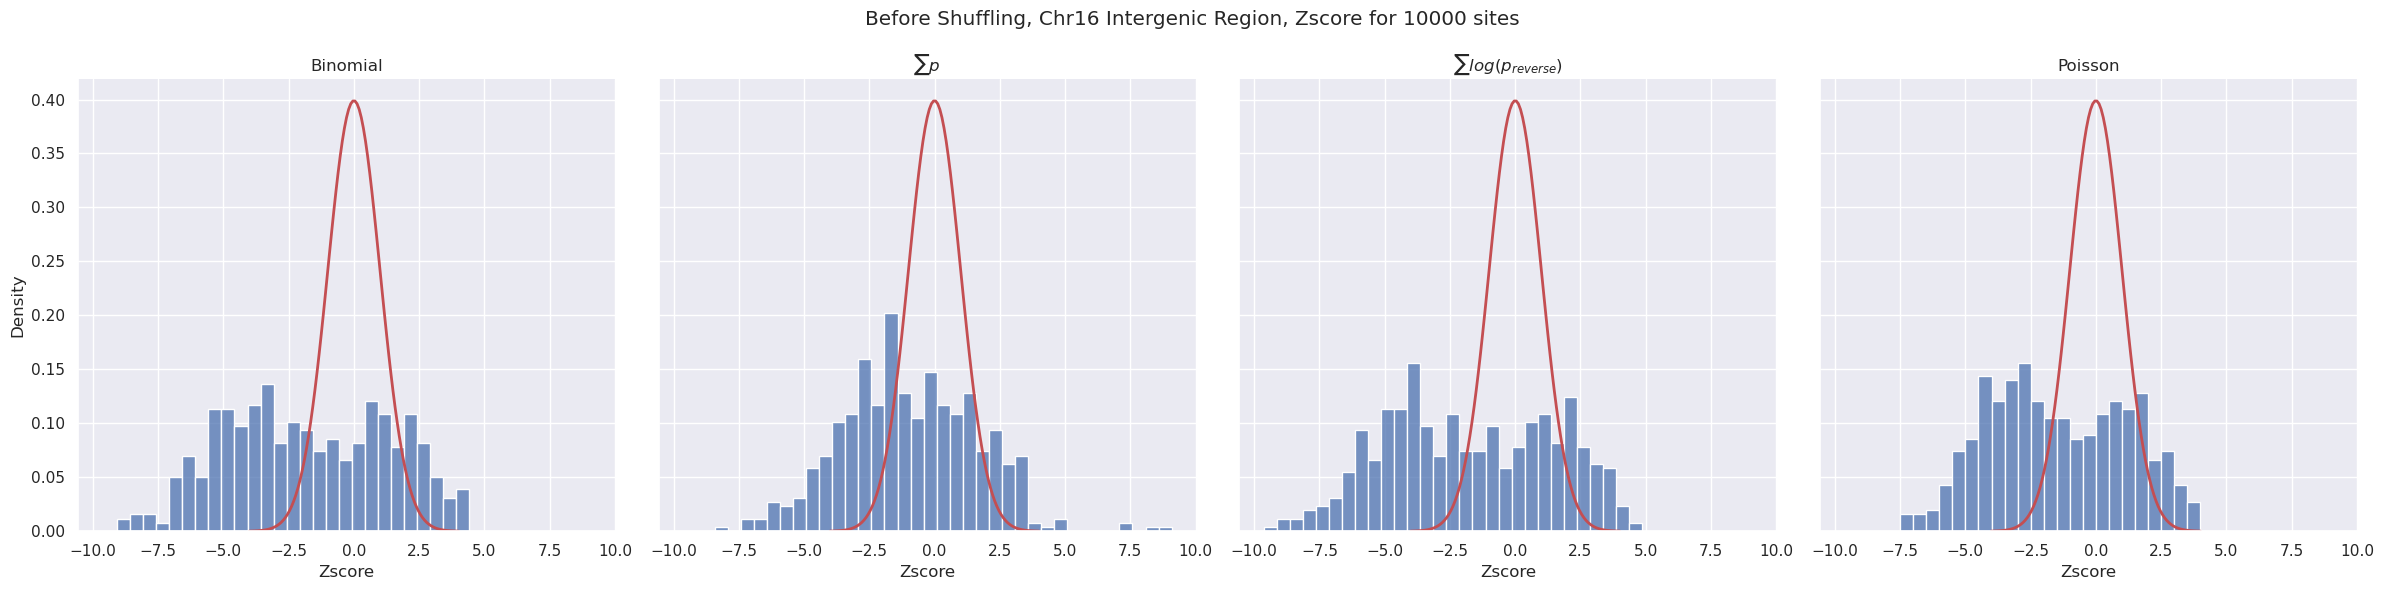

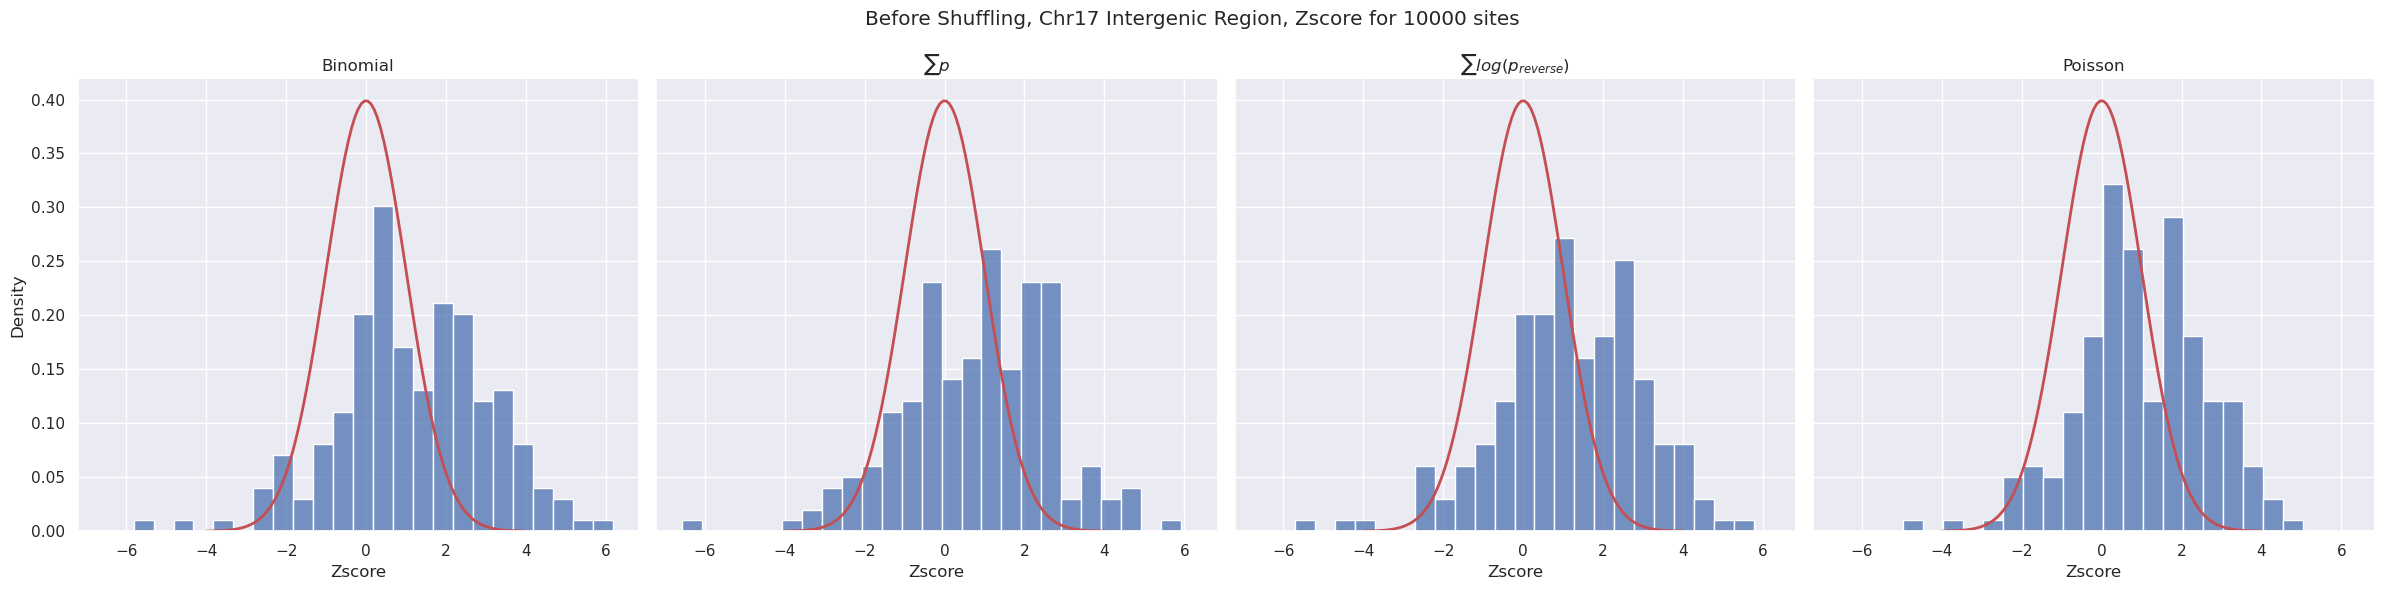

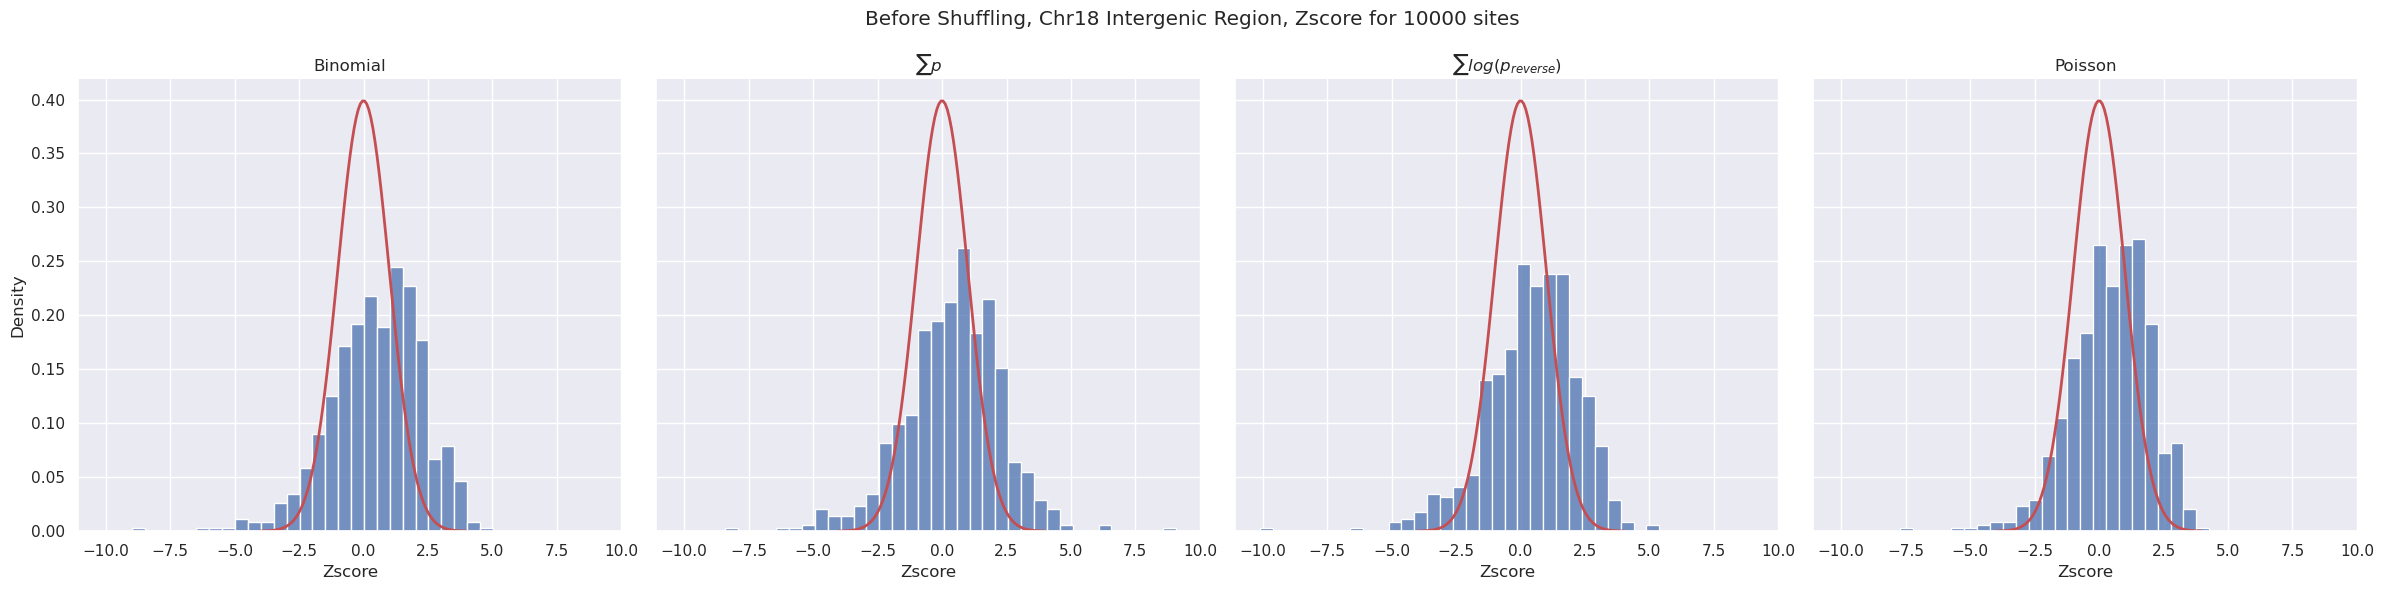

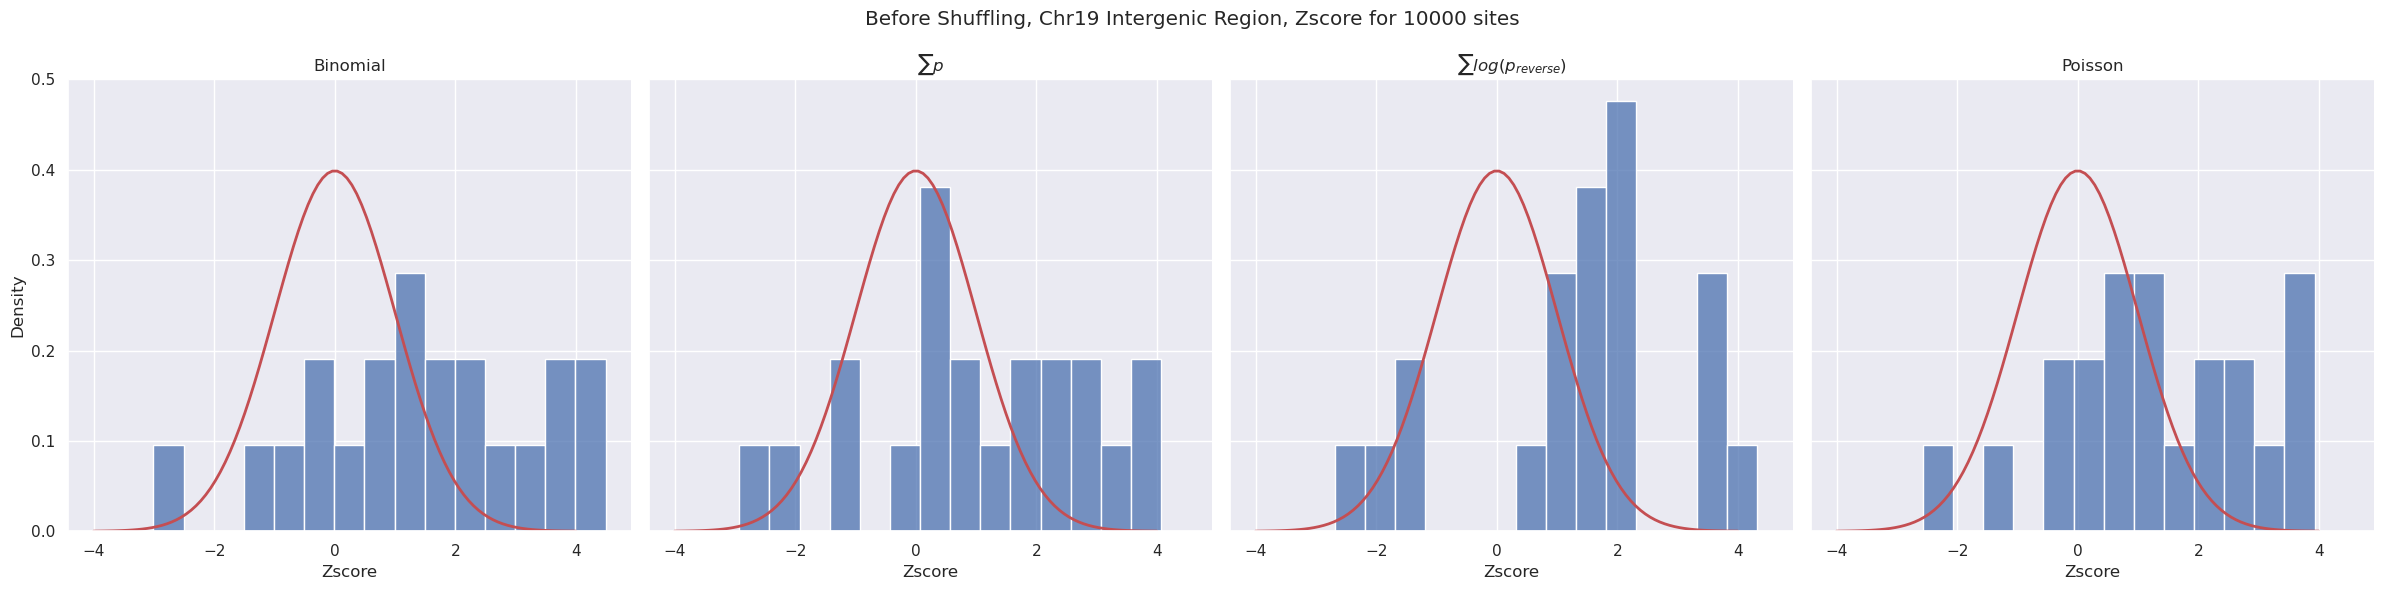

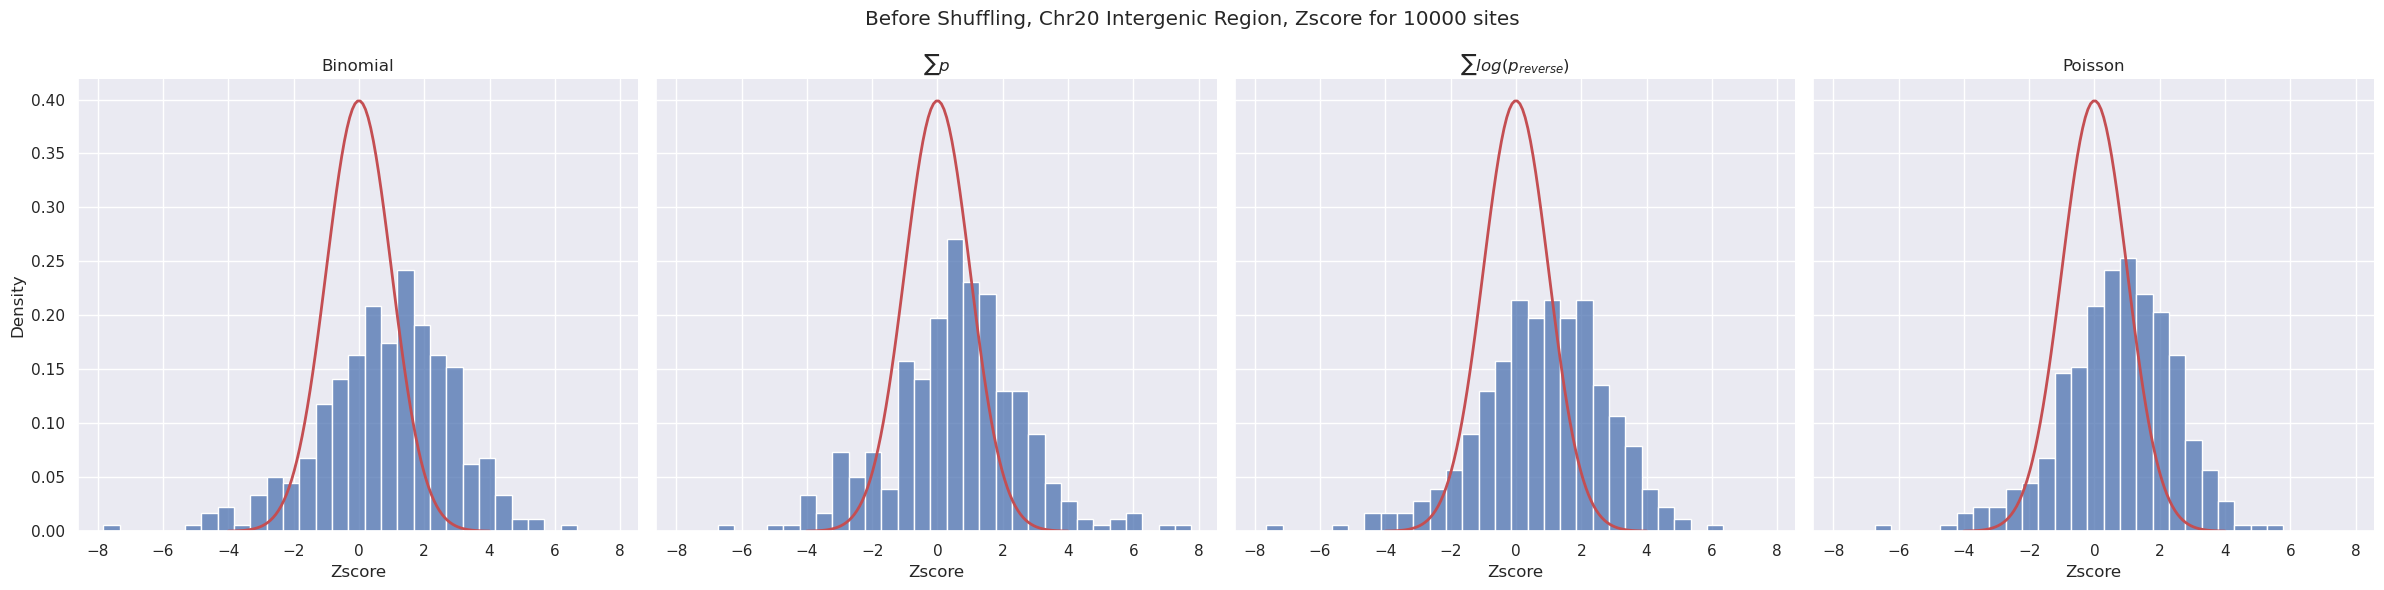

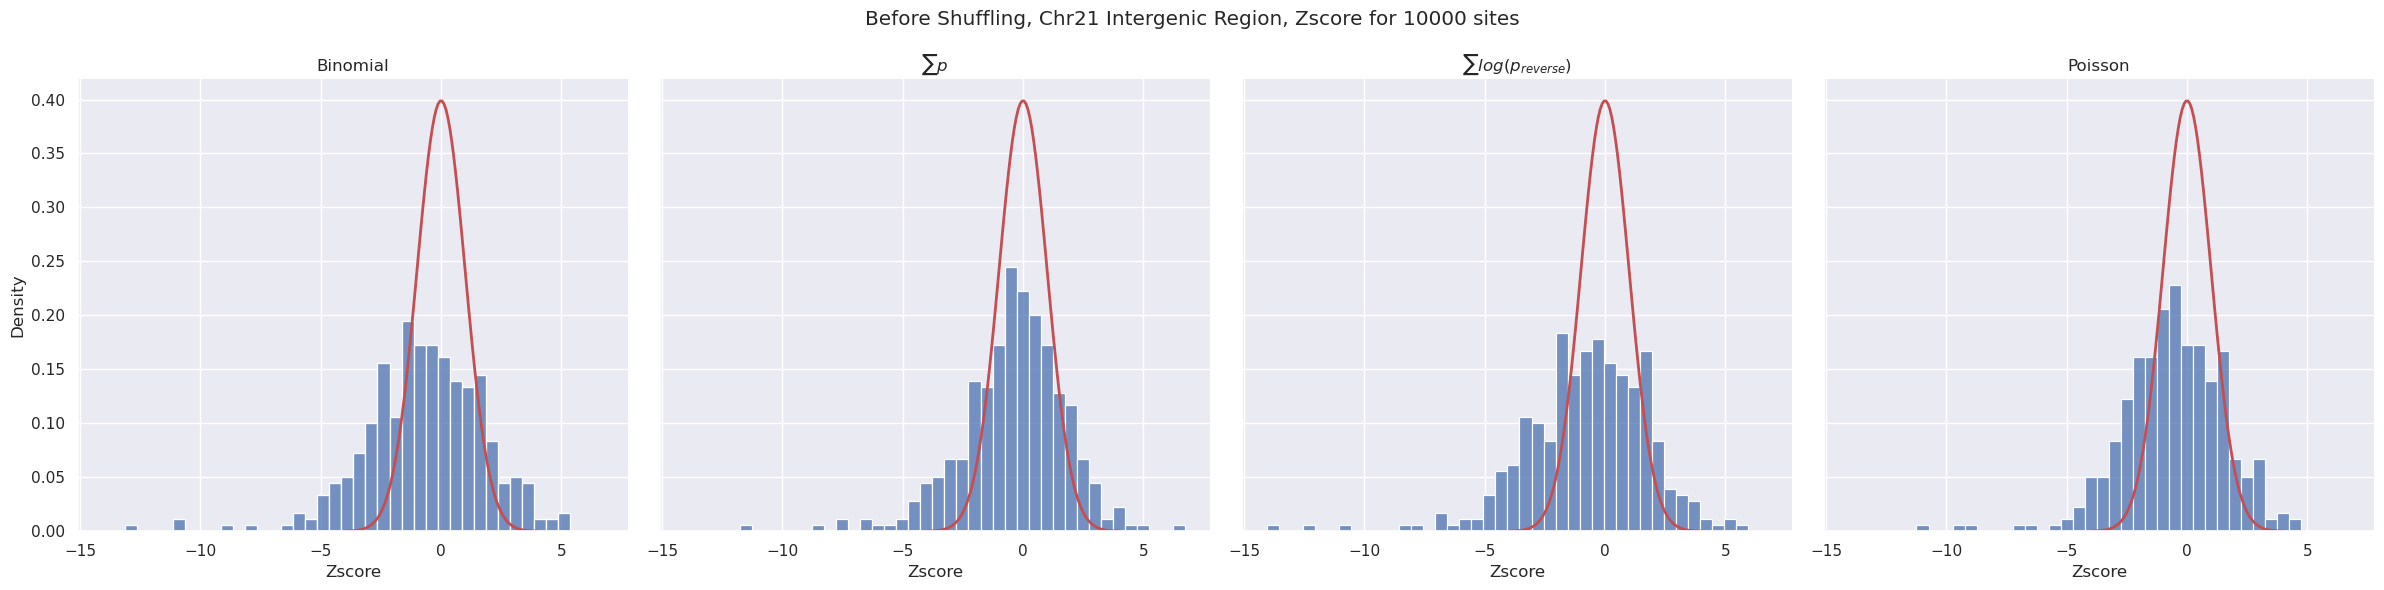

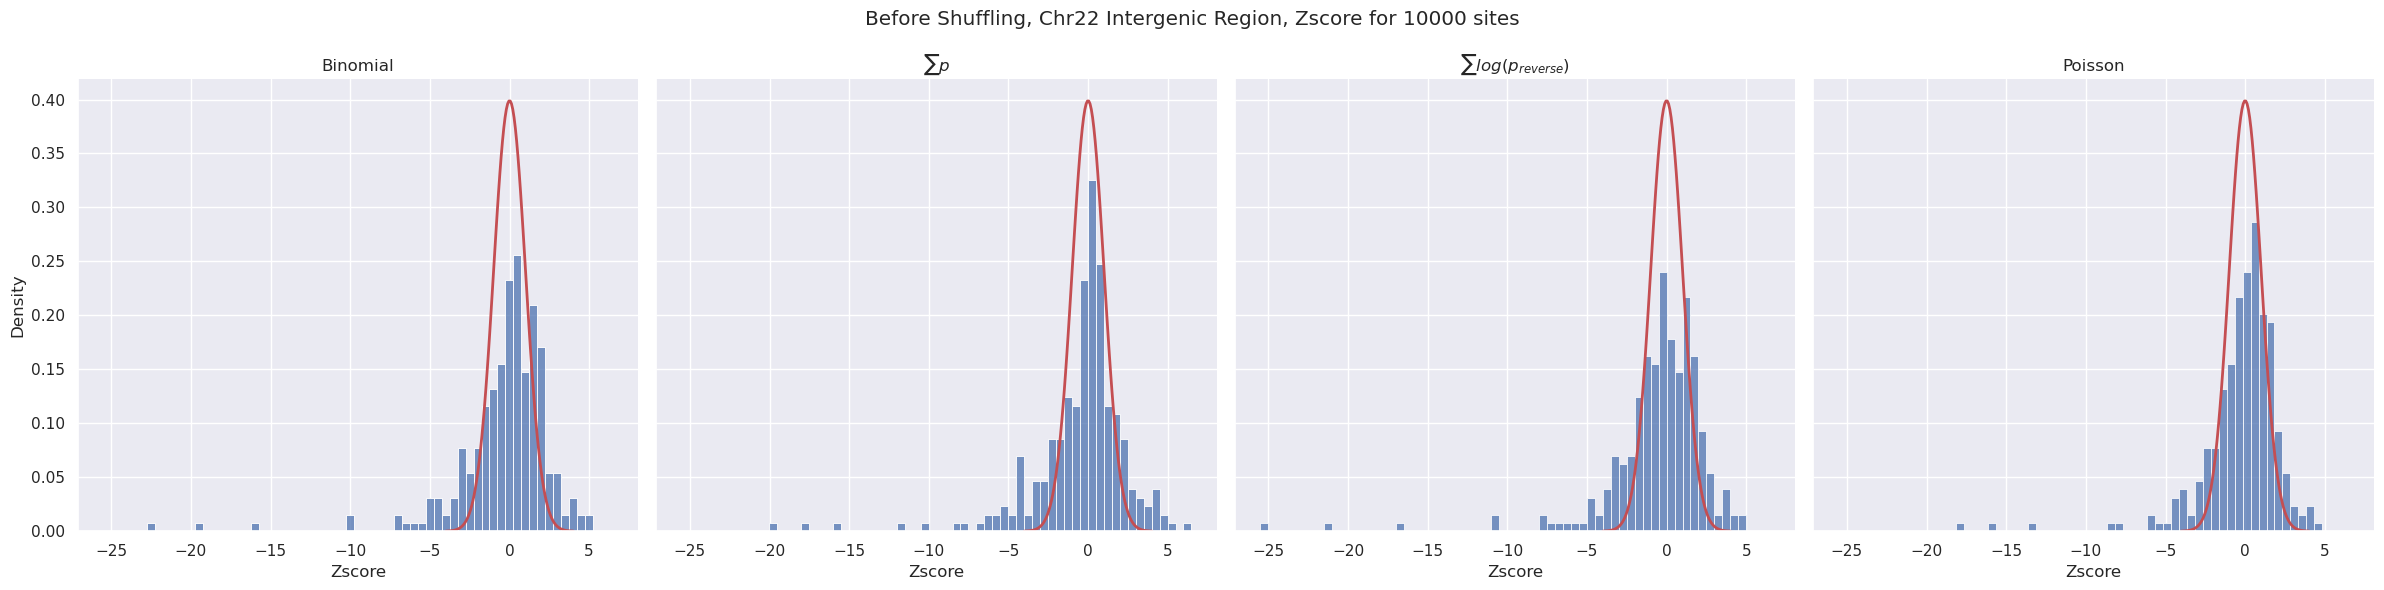

In [11]:
for chrom in range(1, 23):
    filename = os.path.join(KL_data_dir, f"whole_genome/windows/neutral_10000sites/{chrom}.tsv")
    rate = pd.read_csv(filename, sep = "\t")
    rate_neutral_groups_sum_zscore = pd.melt(rate, value_vars=['Zscore_2', 'Zscore_9', 'Zscore_9_reverse_log', "Zscore_Gnocchi"], value_name = "Zscore", var_name = "type")
    plot_zscore(rate_neutral_groups_sum_zscore, chrom)

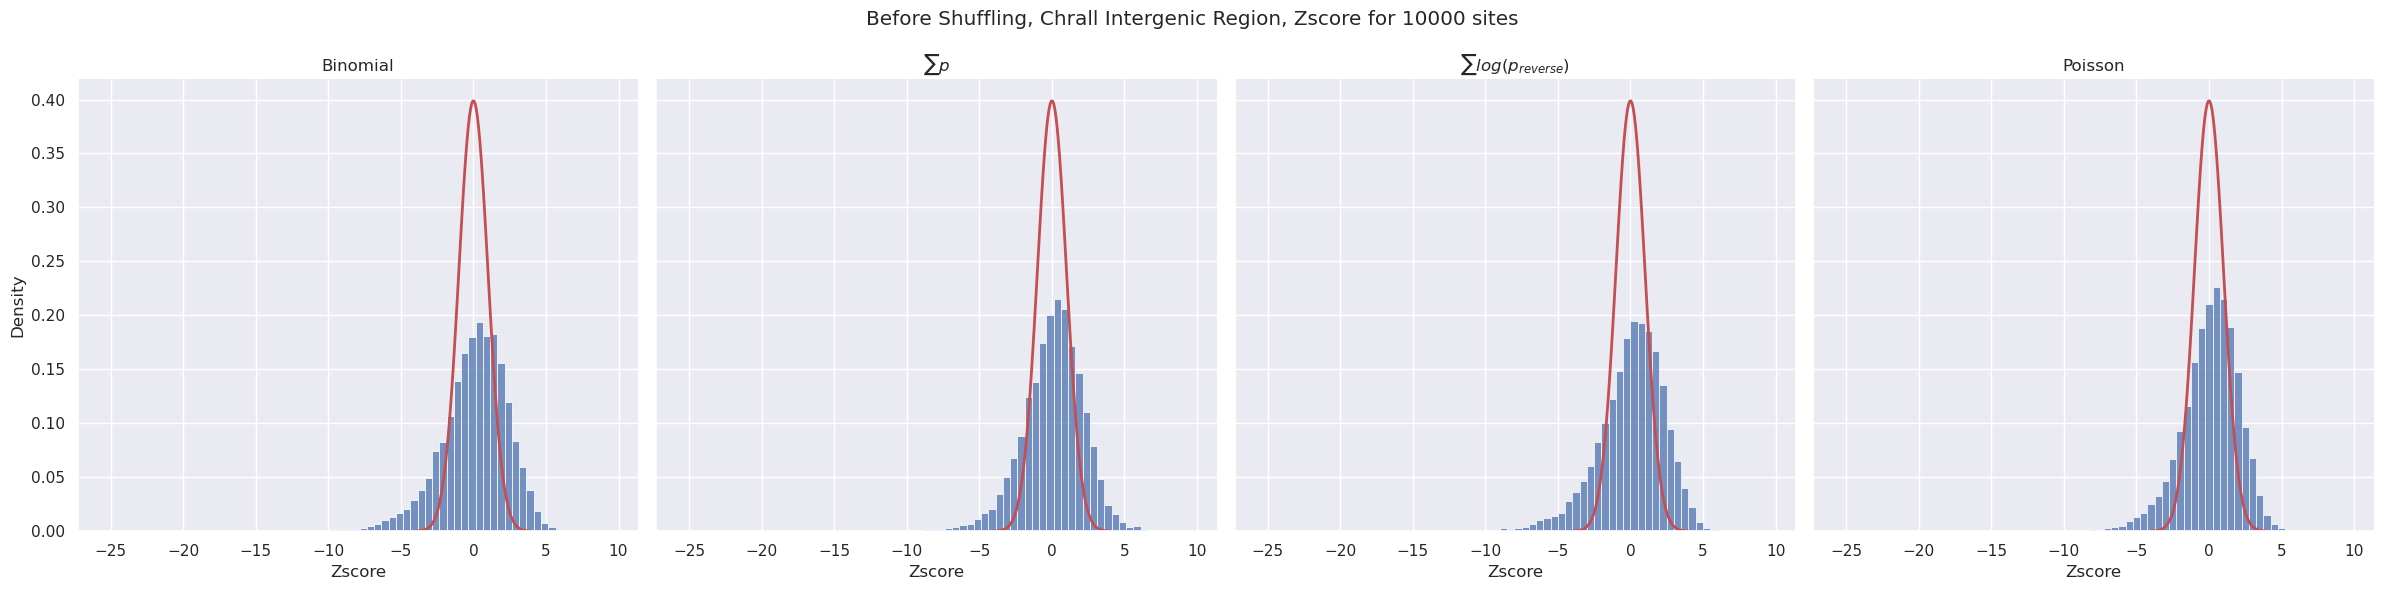

In [16]:
df_list = []

for chrom in range(1, 23):
    filename = os.path.join(KL_data_dir, f"whole_genome/windows/neutral_10000sites/{chrom}.tsv")
    rate = pd.read_csv(filename, sep = "\t")
    rate["Chrom"] = chrom
    
    df_list.append(rate)
    
rate_all = pd.concat(df_list)    
rate_neutral_groups_sum_zscore = pd.melt(rate_all, value_vars=['Zscore_2', 'Zscore_9', 'Zscore_9_reverse_log', "Zscore_Gnocchi"], value_name = "Zscore", var_name = "type")
plot_zscore(rate_neutral_groups_sum_zscore, "all")

In [15]:
rate_all.mean(axis = 0)

p_2                    -1.566542e+03
p_9                    -8.694076e+03
p_9_reverse_log        -3.592715e+03
E[p_2]                 -1.566534e+03
E[p_9]                 -8.694080e+03
E[p_9_reverse_log]     -3.592707e+03
Var[p_2]                1.156208e+03
Var[p_9]                3.736841e+01
Var[p_9_reverse_log]    8.803506e+03
Zscore_2                3.099984e-02
Zscore_9                5.610471e-02
Zscore_9_reverse_log    7.616563e-03
Zscore_Gnocchi          3.423080e-02
start                   8.072070e+07
end                     8.093192e+07
n_sites                 1.000000e+04
dtype: float64

In [17]:
rate_all[]rate_all["Zscore_9"] > 5

SyntaxError: invalid syntax (3697794439.py, line 1)

In [36]:
rate_neutral["region"] = np.arange(len(rate_neutral.index))//50

In [40]:
rate_neutral[rate_neutral["region"].isin(index)].to_csv("neutral_chr22_outlier.tsv", sep = "\t", index = None)

In [3]:
chrom = 3
filename = os.path.join(scratch_dir, f"whole_genome/p_9/{chrom}/_metadata")
rate = dd.read_parquet(filename.split("_metadata")[0])

In [5]:
for freq_bin in [9]:
    rate[f"Zscore_{freq_bin}"] = ((rate[f"p_{freq_bin}"] - rate[f"E[p_{freq_bin}]"])/
                                                np.sqrt(rate[f"Var[p_{freq_bin}]"]))


In [6]:
rate.head()

,Pos,mu,Allele_ref,Allele,mu_index,AN_total_interpolate,AC_total,filter_int,AF_gnomADv3,AF_ukb,AF,window_100bp,polymorphic,polymorphic_100bp,Neutral,cds,Freq_bin_9,Freq_bin_10,p_9,E[p_9],Var[p_9],Zscore_9
0,12200,0.041,A,C,3,1135038.0,1.0,3,0.000007,NaN,8.810278e-07,0,1,90,NaN,False,1,1,-0.949767,-0.905086,0.000443,-2.122215
1,12200,0.020,A,T,1,1134263.0,0.0,3,NaN,NaN,0.000000e+00,0,0,90,NaN,False,0,0,-0.946241,-0.948165,0.000070,0.230569
2,12200,0.094,A,G,8,1134263.0,0.0,3,NaN,NaN,0.000000e+00,0,0,90,NaN,False,0,0,-0.777523,-0.809592,0.003986,0.507928
3,12201,0.083,A,G,7,1134263.0,1.0,4,NaN,0.000001,8.816297e-07,0,1,90,NaN,False,1,1,-0.897107,-0.826126,0.002978,-1.300691
4,12201,0.013,A,T,0,1134263.0,0.0,4,NaN,NaN,0.000000e+00,0,0,90,NaN,False,0,0,-0.965322,-0.966130,0.000019,0.183913


In [3]:
rate_neutral = rate[~rate["Neutral"].isna()].compute()
rate_neutral = rate_neutral.reset_index(drop = True)

/home/djl34/mambaforge/envs/raklette/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(
2024-05-22 00:26:27,754 - distributed.worker.state_machine - WARNING - Async instruction for <Task cancelled name="execute(('getitem-b89998a7aff62cc199d4d62c99f91de4', 30))" coro=<Worker.execute() done, defined at /home/djl34/mambaforge/envs/raklette/lib/python3.9/site-packages/distributed/worker_state_machine.py:3610>> ended with CancelledError


KeyboardInterrupt: 

Process Dask Worker process (from Nanny):
Traceback (most recent call last):
  File "/home/djl34/mambaforge/envs/raklette/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/djl34/mambaforge/envs/raklette/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/djl34/mambaforge/envs/raklette/lib/python3.9/site-packages/distributed/process.py", line 202, in _run
    target(*args, **kwargs)
  File "/home/djl34/mambaforge/envs/raklette/lib/python3.9/site-packages/distributed/nanny.py", line 1014, in _run
    asyncio_run(run(), loop_factory=get_loop_factory())
  File "/home/djl34/mambaforge/envs/raklette/lib/python3.9/site-packages/distributed/compatibility.py", line 236, in asyncio_run
    return loop.run_until_complete(main)
  File "/home/djl34/mambaforge/envs/raklette/lib/python3.9/asyncio/base_events.py", line 634, in run_until_complete
    self.run_forever()
  File "/home/djl34/m